# Analyse trajectoire etco2

Karine H.

### Idée : 

Prendre une variable de mesures des tables fct_ et regarder son évolution au cours de l'opération.  
Suivant le type du patient (immediate_extubation 1/0, secondary_intubation 1/0), regarder si on trouve des trajectoires similaires.  
(---> *regarder le papier fourni par Antoine sur l'analyse de trajectoire (avec R)*)

Sur ce notebook, exemple avec la variable etco2 de fct_respiratory car bon indicateur global d'après la doc


### Méthode:

- Besoin de merger la table fct_respiratory avec dim_patient
- Besoin de transposer la table pour que colonne = temps qui passe et lignes = mesuers de etco2 pour 1 patient
- Besoin de faire partir tous les patiens à 0:00 ---> jusque la durée de leur opération :
    - Tous les patiens n'ont pas la mếme durée, NA en fin de ligne ?
    - Garder en mémoire date de début, date de fin, durée opérations


### Remarques:

- Notebok d'après sur les data de master, seulement 94 patients dans les fct --> A retravailler avec les nouvelles tables du drive \[UPDATE ---> OK\]


- **/!\ BUGS /!\ :** Au cours du notebook on décele plusieurs types de bugs compliquant la construction du "transpose dataset"
    - 1) Le format de 'date_transplantation' n'est pas le même dans tte la colonne

    - 2) date_transplation = date_sortie_bloc dans dim_patient et pourtant dans fct_respiratory, l'opération dure toute la nuit donc concerne 2 jours

    - 3) Il peut manquer certaines minutes, exemple patient 303 qui passe de 14h26 à 14h28  
 id_patient : 303,  
 (solution temporaire -> obs gardées et traitées comme si la minuterie était continue) 

    - 4) Certains patients ont des opérations très longues avec coupures dans le temps.  
 Exemple patient 323 : opération commence à 2h11 jusque 20h27 puis reprend à 11h41 jusque 15h26 du jour d'après !)  
id_patient : 323, 305  
(solution temporaire -> obs enlevées du dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# I. Download



In [2]:
path = "../data"
df_respiratory=pd.read_csv(path + "/fct_respiratory.csv",dtype={'id_patient':np.int32}, usecols=list(np.arange(1,19)))
df_patient=pd.read_csv(path + "/dim_patient.csv", 
                       usecols=["id_patient","immediate_extubation","secondary_intubation", 
                                "in_hospital_mortality","30_d_survival", "date_transplantation", "date_sortie_bloc"])

In [3]:
df_patient.head()

id_patient date_transplantation date_sortie_bloc  immediate_extubation  \
0           1           05/01/2012           1/5/12                   0.0   
1           2           08/01/2012           1/8/12                   1.0   
2           3           11/01/2012          1/12/12                   0.0   
3           4           15/01/2012          1/15/12                   0.0   
4           5           17/01/2012          1/18/12                   0.0   

   secondary_intubation  in_hospital_mortality  30_d_survival  
0                   0.0                    0.0            1.0  
1                   0.0                    0.0            1.0  
2                   0.0                    0.0            1.0  
3                   0.0                    0.0            1.0  
4                   0.0                    0.0            1.0

In [4]:
df_patient.dtypes

id_patient                 int64
date_transplantation      object
date_sortie_bloc          object
immediate_extubation     float64
secondary_intubation     float64
in_hospital_mortality    float64
30_d_survival            float64
dtype: object

In [5]:
len(np.unique(df_respiratory['id_patient'].values))

212

In [6]:
df_patient.iloc[214:303,:]

id_patient date_transplantation date_sortie_bloc  immediate_extubation  \
214         215           31/07/2015           8/1/15                   1.0   
215         216              8/20/15          8/20/15                   0.0   
216         217              8/28/15          8/29/15                   0.0   
217         218              8/29/15          8/30/15                   1.0   
218         219               9/6/15           9/7/15                   1.0   
219         220               9/8/15           9/8/15                   0.0   
220         221              9/13/15          9/14/15                   0.0   
221         222              9/25/15          9/26/15                   0.0   
222         223             10/10/15         10/10/15                   0.0   
223         224             10/10/15         10/10/15                   0.0   
224         225             10/13/15         10/14/15                   0.0   
225         226             10/14/15         10/15/15                   0.0   
226         227             10/19/15         10/20/15                   0.0   
227         228             10/24/15         10/24/15                   1.0   
228         229              11/3/15          11/4/15                   1.0   
229         230              11/6/15          11/6/15                   0.0   
230         231             11/22/15         11/22/15                   1.0   
231         232             11/25/15         11/26/15                   0.0   
232         233             11/26/15         11/27/15                   1.0   
233         234             11/29/15         11/29/15                   0.0   
234         235             12/10/15         12/10/15                   0.0   
235         236             12/12/15         12/12/15                   0.0   
236         237             12/14/15         12/15/15                   1.0   
237         238             12/20/15         12/21/15                   1.0   
238         239             12/29/15         12/30/15                   1.0   
239         240               1/9/16          1/10/16                   1.0   
240         241              1/11/16          1/12/16                   1.0   
241         242              1/14/16          1/14/16                   0.0   
242         243              1/19/16          1/20/16                   0.0   
243         244              1/22/16          1/23/16                   1.0   
..          ...                  ...              ...                   ...   
273         274              6/14/16          6/14/16                   1.0   
274         275              6/21/16          6/21/16                   1.0   
275         276              6/26/16          6/27/16                   1.0   
276         277               7/1/16           7/2/16                   0.0   
277         278               7/9/16          7/10/16                   0.0   
278         279              7/11/16          7/11/16                   0.0   
279         280              7/14/16          7/14/16                   0.0   
280         281              7/15/16          7/15/16                   0.0   
281         282              7/22/16          7/23/16                   1.0   
282         283              7/26/16          7/26/16                   0.0   
283         284              7/30/16          7/30/16                   0.0   
284         285               8/2/16           8/2/16                   0.0   
285         286               8/6/16           8/7/16                   0.0   
286         287              8/19/16          8/20/16                   0.0   
287         288              8/21/16          8/22/16                   1.0   
288         289              8/25/16          8/26/16                   1.0   
289         290              8/31/16           9/1/16                   0.0   
290         291              9/11/16          9/12/16                   1.0   
291         292              10/5/16          10/5/16  

Le format de la variable *date_transplatation* n'est pas le même pour une petite centaine de patients.  
Il faut faire une modification avant de passer en format datetime sinon le mois et le jour sont inversés

### I.1 Transform *date_transplantation*

In [7]:
day,month,year = df_patient['date_transplantation'].str.split('/').str

for i, (d,m,y) in enumerate(zip(day,month,year)):
    if type(y)==str and len(y)<4:
        #if type(y) != str then y is nan (type float) and has no len() 
        
        df_patient['date_transplantation'].iloc[i] = m+"/"+d+"/20"+y

/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df_patient.iloc[214:220,:]

id_patient date_transplantation date_sortie_bloc  immediate_extubation  \
214         215           31/07/2015           8/1/15                   1.0   
215         216            20/8/2015          8/20/15                   0.0   
216         217            28/8/2015          8/29/15                   0.0   
217         218            29/8/2015          8/30/15                   1.0   
218         219             6/9/2015           9/7/15                   1.0   
219         220             8/9/2015           9/8/15                   0.0   

     secondary_intubation  in_hospital_mortality  30_d_survival  
214                   0.0                    0.0            1.0  
215                   1.0                    1.0            1.0  
216                   0.0                    0.0            1.0  
217                   0.0                    0.0            1.0  
218                   0.0                    0.0            1.0  
219                   0.0                    0.0            1.0

In [9]:
df_patient.iloc[297:302,:]

id_patient date_transplantation date_sortie_bloc  immediate_extubation  \
297         298            2/11/2016          11/3/16                   0.0   
298         299            5/11/2016          11/6/16                   0.0   
299         300           17/11/2016         11/17/16                   0.0   
300         301           21/11/2016         11/21/16                   0.0   
301         302           25/11/2016         11/25/16                   1.0   

     secondary_intubation  in_hospital_mortality  30_d_survival  
297                   1.0                    0.0            1.0  
298                   0.0                    0.0            1.0  
299                   0.0                    0.0            1.0  
300                   0.0                    1.0            0.0  
301                   0.0                    0.0            1.0

In [10]:
df_patient['date_transplantation']=pd.to_datetime(df_patient['date_transplantation'].astype('str'), format="%d/%m/%Y")

### I.2 Transform *date_sortie_bloc*

In [11]:
month,day,year = df_patient['date_sortie_bloc'].str.split('/').str
df_patient['date_sortie_bloc']=day+"/"+month+"/20"+year
df_patient['date_sortie_bloc']=pd.to_datetime(df_patient['date_sortie_bloc'].astype('str'), format="%d/%m/%Y")

In [12]:
df_patient.dtypes

id_patient                        int64
date_transplantation     datetime64[ns]
date_sortie_bloc         datetime64[ns]
immediate_extubation            float64
secondary_intubation            float64
in_hospital_mortality           float64
30_d_survival                   float64
dtype: object

In [13]:
df_patient.head()

id_patient date_transplantation date_sortie_bloc  immediate_extubation  \
0           1           2012-01-05       2012-01-05                   0.0   
1           2           2012-01-08       2012-01-08                   1.0   
2           3           2012-01-11       2012-01-12                   0.0   
3           4           2012-01-15       2012-01-15                   0.0   
4           5           2012-01-17       2012-01-18                   0.0   

   secondary_intubation  in_hospital_mortality  30_d_survival  
0                   0.0                    0.0            1.0  
1                   0.0                    0.0            1.0  
2                   0.0                    0.0            1.0  
3                   0.0                    0.0            1.0  
4                   0.0                    0.0            1.0

### I.3 Merge df_respiratory and df_patient

In [14]:
df_respiratory.dtypes

etco2         float64
eto2          float64
fico2         float64
fin2o         float64
fr              int64
fr_ecg          int64
fio2          float64
mac             int64
peeptotal       int64
pmax            int64
pmean           int64
pplat           int64
rr_co2        float64
spo2          float64
svo2__m       float64
vt            float64
id_patient      int32
time           object
dtype: object

In [15]:
df_respiratory.shape

(141850, 18)

In [16]:
df_respiratory_merged=df_respiratory.merge(df_patient, how='left', on="id_patient")

In [17]:
df_respiratory_merged.shape

(141850, 24)

In [18]:
df_respiratory_merged.head()

etco2   eto2  fico2  fin2o  fr  fr_ecg   fio2  mac  peeptotal  pmax  \
0    0.0    0.0    0.0    0.0   0       0    0.0    0          0     0   
1    0.0   99.0    0.0    0.0  14       0   99.0    0          5    29   
2    0.0   99.0    0.0    0.0  14       0   99.0    0          5    29   
3    0.0   99.0    0.0    0.0  14       0   99.0    0          5    29   
4    0.0  100.0    0.0    0.0  14       0  100.0    0          5    29   

       ...       svo2__m     vt  id_patient   time  date_transplantation  \
0      ...           0.0    0.0         381   5:11            2018-01-18   
1      ...           0.0  455.0         381   5:13            2018-01-18   
2      ...           0.0  460.0         381   5:14            2018-01-18   
3      ...           0.0  456.0         381   5:15            2018-01-18   
4      ...           0.0  455.0         381   5:16            2018-01-18   

   date_sortie_bloc  immediate_extubation secondary_intubation  \
0        2018-01-18                   0.0                  0.0   
1        2018-01-18                   0.0                  0.0   
2        2018-01-18                   0.0                  0.0   
3        2018-01-18                   0.0                  0.0   
4        2018-01-18                   0.0                  0.0   

  in_hospital_mortality 30_d_survival  
0                   0.0           1.0  
1                   0.0           1.0  
2                   0.0           1.0  
3                   0.0           1.0  
4                   0.0           1.0  

[5 rows x 24 columns]

In [19]:
#etco2 ---> CO2 expiré = marqueur d'équilibre général (doc bdd expliquée)

### I.4 Concat Time & Date

In [19]:
id_patient = np.unique(df_respiratory_merged['id_patient'].values)
len(id_patient)

212

In [20]:
df_respiratory_merged['transplantation_dt'] = df_respiratory_merged['date_transplantation']

In [21]:
df_respiratory_merged[df_respiratory_merged['time']=='0']

etco2  eto2  fico2  fin2o  fr  fr_ecg  fio2  mac  peeptotal  pmax  \
39151     0.0   0.0    0.0    0.0   0       0   0.0    0          0     0   
63825     0.0   0.0    0.0    0.0   0       0   0.0    0          0     0   
130422    0.0   0.0    0.0    0.0   0       0   0.0    0          0     0   

              ...           vt  id_patient  time  date_transplantation  \
39151         ...          0.0         151     0            2014-07-29   
63825         ...          0.0         233     0            2015-11-26   
130422        ...          0.0         193     0            2015-03-29   

        date_sortie_bloc  immediate_extubation  secondary_intubation  \
39151         2014-07-29                   0.0                   0.0   
63825         2015-11-27                   1.0                   0.0   
130422        2015-03-30                   1.0                   1.0   

       in_hospital_mortality 30_d_survival transplantation_dt  
39151                    1.0           0.0         2014-07-29  
63825                    0.0           1.0         2015-11-26  
130422                   0.0           1.0         2015-03-29  

[3 rows x 25 columns]

In [23]:
#probleme 

In [22]:
df_respiratory_merged=df_respiratory_merged[df_respiratory_merged['id_patient']!=151]
df_respiratory_merged=df_respiratory_merged[df_respiratory_merged['id_patient']!=233]
df_respiratory_merged=df_respiratory_merged[df_respiratory_merged['id_patient']!=193]

In [23]:
def create_dt_transplantation(data_init):
    
    data = data_init.copy()
    
    start = datetime.datetime.now()
    print (start.time())
    
    for index, row in data.iterrows():
    
        time = datetime.datetime.strptime(row['time'].strip(), '%H:%M').time()

        if type(time.hour)==int and type(time.minute)==int :
            #otherwise, time is nan
            
            if index != 0 :
                if row['id_patient']==id_patient_1:
                    if time.hour < hour_1:
                        #operation is overnight and we are at day 2
                        if row['date_transplantation']==row['date_sortie_bloc']:
                            #prob with date_sortie_bloc
                            row['date_sortie_bloc'] = row['date_transplantation'] + datetime.timedelta(1)
                            
                        data.loc[index, 'transplantation_dt']=row['date_sortie_bloc'].replace(hour=time.hour, minute=time.minute)

                    else:
                        #same day than line before (day 0 or day 1)
                        data.loc[index, 'transplantation_dt']=transplantation_dt_1.replace(hour=time.hour, minute=time.minute)

                else:
                    #new patient, day 0
                    data.loc[index, 'transplantation_dt']=row['date_transplantation'].replace(hour=time.hour, minute=time.minute)
            else:
                #first patient, day 0
                data.loc[index, 'transplantation_dt']=row['date_transplantation'].replace(hour=time.hour, minute=time.minute)

        transplantation_dt_1 = data.loc[index, 'transplantation_dt']
        id_patient_1=row['id_patient']
        hour_1 = time.hour
    
        if index % 10000 == 0 :
            print (index)
    
    stop = datetime.datetime.now()
    print (stop.time())
    return data

In [24]:
df_etco2 = create_dt_transplantation(df_respiratory_merged)

10:30:37.945632
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
140000
10:33:40.270576


In [25]:
df_etco2.head()

etco2   eto2  fico2  fin2o  fr  fr_ecg   fio2  mac  peeptotal  pmax  \
0    0.0    0.0    0.0    0.0   0       0    0.0    0          0     0   
1    0.0   99.0    0.0    0.0  14       0   99.0    0          5    29   
2    0.0   99.0    0.0    0.0  14       0   99.0    0          5    29   
3    0.0   99.0    0.0    0.0  14       0   99.0    0          5    29   
4    0.0  100.0    0.0    0.0  14       0  100.0    0          5    29   

          ...             vt  id_patient   time  date_transplantation  \
0         ...            0.0         381   5:11            2018-01-18   
1         ...          455.0         381   5:13            2018-01-18   
2         ...          460.0         381   5:14            2018-01-18   
3         ...          456.0         381   5:15            2018-01-18   
4         ...          455.0         381   5:16            2018-01-18   

   date_sortie_bloc  immediate_extubation  secondary_intubation  \
0        2018-01-18                   0.0                   0.0   
1        2018-01-18                   0.0                   0.0   
2        2018-01-18                   0.0                   0.0   
3        2018-01-18                   0.0                   0.0   
4        2018-01-18                   0.0                   0.0   

  in_hospital_mortality 30_d_survival  transplantation_dt  
0                   0.0           1.0 2018-01-18 05:11:00  
1                   0.0           1.0 2018-01-18 05:13:00  
2                   0.0           1.0 2018-01-18 05:14:00  
3                   0.0           1.0 2018-01-18 05:15:00  
4                   0.0           1.0 2018-01-18 05:16:00  

[5 rows x 25 columns]

# II. Focus on etco2

------------

Obj : regarder l'evolution de la variable pendant l'opération selon les patients

In [26]:
df_etco2.shape

(138166, 25)

In [27]:
df_etco2.dtypes

etco2                           float64
eto2                            float64
fico2                           float64
fin2o                           float64
fr                                int64
fr_ecg                            int64
fio2                            float64
mac                               int64
peeptotal                         int64
pmax                              int64
pmean                             int64
pplat                             int64
rr_co2                          float64
spo2                            float64
svo2__m                         float64
vt                              float64
id_patient                        int32
time                             object
date_transplantation     datetime64[ns]
date_sortie_bloc         datetime64[ns]
immediate_extubation            float64
secondary_intubation            float64
in_hospital_mortality           float64
30_d_survival                   float64
transplantation_dt       datetime64[ns]


In [28]:
### BUGSS

In [29]:
df_etco2[df_etco2['id_patient']==323]

etco2  eto2  fico2  fin2o  fr  fr_ecg  fio2  mac  peeptotal  pmax  \
16504    0.0   0.0    0.0    0.0   0      21   0.0    0          0     0   
16505    0.0   0.0    0.0    0.0   0      24   0.0    0          0     0   
16506    0.0   0.0    0.0    0.0   0      22   0.0    0          0     0   
16507    0.0   0.0    0.0    0.0   0      22   0.0    0          0     0   
16508    0.0   0.0    0.0    0.0   0      24   0.0    0          0     0   
16509    0.0   0.0    0.0    0.0   0      31   0.0    0          0     0   
16510    0.0   0.0    0.0    0.0   0      36   0.0    0          0     0   
16511    0.0   0.0    0.0    0.0   0      25   0.0    0          0     0   
16512    0.0   0.0    0.0    0.0   0      24   0.0    0          0     0   
16513    0.0   0.0    0.0    0.0   0      34   0.0    0          0     0   
16514    0.0   0.0    0.0    0.0   0      28   0.0    0          0     0   
16515    0.0   0.0    0.0    0.0   0      18   0.0    0          0     0   
16516    0.0   0.0    0.0    0.0   0      29   0.0    0          0     0   
16517    0.0   0.0    0.0    0.0   0      18   0.0    0          0     0   
16518    0.0   0.0    0.0    0.0   0      17   0.0    0          0     0   
16519    0.0   0.0    0.0    0.0   0      18   0.0    0          0     0   
16520    0.0   0.0    0.0    0.0   0      21   0.0    0          0     0   
16521    0.0   0.0    0.0    0.0   0      40   0.0    0          0     0   
16522    0.0   0.0    0.0    0.0   0      46   0.0    0          0     0   
16523    0.0   0.0    0.0    0.0   0      28   0.0    0          0     0   
16524    0.0   0.0    0.0    0.0   0      48   0.0    0          0     0   
16525    0.0   0.0    0.0    0.0   0      19   0.0    0          0     0   
16526    0.0   0.0    0.0    0.0   0      19   0.0    0          0     0   
16527    0.0   0.0    0.0    0.0   0      23   0.0    0          0     0   
16528    0.0   0.0    0.0    0.0   0      27   0.0    0          0     0   
16529    0.0   0.0    0.0    0.0   0      40   0.0    0          0     0   
16530    0.0   0.0    0.0    0.0   0      26   0.0    0          0     0   
16531    0.0   0.0    0.0    0.0   0      32   0.0    0          0     0   
16532    0.0   0.0    0.0    0.0   0      32   0.0    0          0     0   
16533    0.0   0.0    0.0    0.0   0      25   0.0    0          0     0   
...      ...   ...    ...    ...  ..     ...   ...  ...        ...   ...   
19203    0.0   0.0    0.0    0.0   0      25   0.0    0          0     0   
19204    0.0   0.0    0.0    0.0   0      26   0.0    0          0     0   
19205    0.0   0.0    0.0    0.0   0      24   0.0    0          0     0   
19206    0.0   0.0    0.0    0.0   0      23   0.0    0          0     0   
19207    0.0   0.0    0.0    0.0   0      27   0.0    0          0     0   
19208    0.0   0.0    0.0    0.0   0      26   0.0    0          0     0   
19209    0.0   0.0    0.0    0.0   0      25   0.0    0          0     0   
19210    0.0   0.0    0.0    0.0   0      24   0.0    0          0     0   
19211    0.0   0.0    0.0    0.0   0      30   0.0    0          0     0   
19212    0.0   0.0    0.0    0.0   0      25   0.0    0          0     0   
19213    0.0   0.0    0.0    0.0   0      22   0.0    0          0     0   
19214    0.0   0.0    0.0    0.0   0      28   0.0    0          0     0   
19215    0.0   0.0    0.0    0.0   0      26   0.0    0          0     0   
19216    0.0   0.0    0.0    0.0   0      27   0.0    0          0     0   
19217    0.0   0.0    0.0    0.0   0      25   0.0    0          0     0   
19218    0.0   0.0    0.0    0.0   0      25   0.0    0          0     0   
19219    0.0   0.0    0.0    0.0   0      23   0.0    0          0     0   
19220    0.0   0.0    0.0    0.0   0      27   0.0    0          0     0   
19221    0.0   0.0    0.0    0.0   0      28   0.0    0          0     0   
19222    0.0   0.0    0.0    0.0   0      27   0.0    0          0     0   
19223    0.0   0.0    0.0    0.0   0      24   0.0    0

In [31]:
df_etco2[df_etco2['id_patient']==405].head()

etco2  eto2  fico2  fin2o  fr  fr_ecg  fio2  mac  peeptotal  pmax  \
94816    0.0   0.0    0.0    0.0   0       0   0.0    0          0     0   
94817    0.0   0.0    0.0    0.0   0       0   0.0    0          0     0   
94818    0.0  25.0    0.0    0.0   0       0  25.0    0          0     0   
94819    0.0  25.0    0.0    0.0   0       0  25.0    0          0     0   
94820    0.0  25.0    0.0    0.0   0       0  25.0    0          0     0   

             ...           vt  id_patient   time  date_transplantation  \
94816        ...          0.0         405   6:29                   NaT   
94817        ...          0.0         405   6:30                   NaT   
94818        ...          0.0         405   6:31                   NaT   
94819        ...          0.0         405   6:32                   NaT   
94820        ...          0.0         405   6:33                   NaT   

       date_sortie_bloc  immediate_extubation  secondary_intubation  \
94816        2018-05-27                   NaN                   NaN   
94817        2018-05-27                   NaN                   NaN   
94818        2018-05-27                   NaN                   NaN   
94819        2018-05-27                   NaN                   NaN   
94820        2018-05-27                   NaN                   NaN   

      in_hospital_mortality 30_d_survival transplantation_dt  
94816                   NaN           NaN                NaT  
94817                   NaN           NaN                NaT  
94818                   NaN           NaN                NaT  
94819                   NaN           NaN                NaT  
94820                   NaN           NaN                NaT  

[5 rows x 25 columns]

In [32]:
df_etco2 = df_etco2[df_etco2['id_patient']!=405]

### II.1 Change dataset

Changer le format du dataset où les colonnes sont les minutes de l'opération et 1 ligne = 1 patient

### Garder la date de début et de fin en mémoire

In [36]:
#debug id 300

In [33]:
id_=300
debug = df_etco2[df_etco2['id_patient']==id_]
debug.shape

(576, 25)

In [34]:
for i in range(debug.shape[0]-1):
    i=i+1
    indexx = debug.index[i]
    index_1 = debug.index[i-1]
    delta = debug.loc[indexx,'transplantation_dt']-debug.loc[index_1,'transplantation_dt']
    if (delta.seconds % 3600) // 60 > 1:
        # plus d'une minute entre les obs
        print (index_1, indexx)
        break
print ("##########################")        
print (debug.loc[index_1])
print ("    ")
print (debug.loc[indexx])

33591 33592
##########################
etco2                                      6
eto2                                      42
fico2                                    0.6
fin2o                                      0
fr                                        24
fr_ecg                                     0
fio2                                      46
mac                                        0
peeptotal                                  0
pmax                                       5
pmean                                      1
pplat                                      0
rr_co2                                    19
spo2                                       0
svo2__m                                    0
vt                                        35
id_patient                               300
time                                   14:26
date_transplantation     2016-11-17 00:00:00
date_sortie_bloc         2016-11-17 00:00:00
immediate_extubation                       0
secondary_intuba

In [76]:
def transpose_data(dataf):
    """
    function that transpose the dataset + bug tracking
    """
    
    start = datetime.datetime.now()
    print (start.time())
    
    #to return
    bug_case_1 = []
    bug_case_2 = []
    id_ok = []
    dataf_T = pd.DataFrame()

    id_patient = np.unique(dataf['id_patient'].values)
    
    i = 0
    hours_max=0
    for id_ in id_patient:
       
        #1. keep info of the operation time
    
        df = dataf[dataf['id_patient']==id_]
        F,L = df.index[0], df.index[-1]
        delta = df.loc[L,'transplantation_dt']-df.loc[F,'transplantation_dt']
        hours = delta.seconds // 3600
        #minutes = (delta.seconds % 3600) // 60

        sub_df_1 = {'id_patient': id_, 'debut': df.loc[F,'transplantation_dt'], 'fin':df.loc[L,'transplantation_dt'], 
                    'duree': delta, 'immediate_extubation' : df.loc[F,'immediate_extubation'], 
                    'secondary_intubation' : df.loc[F,'secondary_intubation']}
        sub_df_1 = pd.DataFrame(data=sub_df_1, index=[0])
        
        #2. Create a list with item h:mm that represents the time of the operation from 0:00 to delta h:mm
        #list_col = []
        #for hour in range(hours+1) : 
         #   for mins in range(60):
         #       if hour == hours and mins == minutes+1:
          #          break
          #      if mins < 10 and hour <10:
          #          list_col.append('0{}:0{}'.format(hour, mins))
          #      elif mins < 10 and hour >=10:
          #          list_col.append('{}:0{}'.format(hour, mins))
          #      elif hour < 10 and mins >=10:
          #          list_col.append('0{}:{}'.format(hour, mins))
          #      else:
          #          list_col.append('{}:{}'.format(hour, mins))
            
        #obs par minutes
        list_col = list(np.arange(delta.seconds // 60)+1)
    
        #3. transpose the observations of etco2
        data=df['etco2'].values
        
        #4 //////////////// DEBUGG \\\\\\\\\\\\\
        #bug quand le nbr de minutes entre heure de début et heures fin opération n'est pas égale au nbr d'obs
        #(+ ou - 10 minutes)
        
        if np.abs(len(list_col) - len(data)) <= 10:
            
            if len(list_col) == len(data):
                id_ok.append(id_)
                
            else :
                bug_case_1.append(id_)
                if len(list_col) > len(data):
                    tronc = len(list_col)-len(data)
                    list_col = list_col[:-tronc]
                else:
                    tronc = len(data)-len(list_col)
                    list_col.extend(range(list_col[-1]+1, list_col[-1]+tronc+1))
            
            sub_df_2 = pd.DataFrame([data], columns=list_col)
            
            #. 5. concat the 2 dataframes
            sub_df = pd.concat([sub_df_1, sub_df_2], axis=1, sort=False)
        
            #6. Add to the global dff with all the patient
            dataf_T = dataf_T.append(sub_df, ignore_index=True)
            
            if hours_max < hours:
                hours_max = hours
                
        else:
            #bug, temps discontinu de plus de 10 minutes
            bug_case_2.append(id_)
            
        i = i+1
            
    stop = datetime.datetime.now()
    print (stop.time())
    return dataf_T, hours_max, id_ok, bug_case_1, bug_case_2

In [77]:
dataf_T, hours_max, id_ok, bug_case_1, bug_case_2 = transpose_data(df_etco2)

11:23:12.377548


/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


11:23:15.750328


In [78]:
dataf_T.shape

(158, 1045)

In [86]:
hours_max

17

In [85]:
len(bug_case_2)

50

In [84]:
for id_ in bug_case_3:
    debug = df_etco2[df_etco2['id_patient']==id_]
    for i in range(debug.shape[0]-1):
        i=i+1
        indexx = debug.index[i]
        indexx_1 = debug.index[i-1]
        delta = debug.loc[indexx,'transplantation_dt']-debug.loc[indexx_1,'transplantation_dt']
        if np.abs((delta.seconds % 3600) // 60) > 9:
            # plus de 9 minutes entre les obs
            print ("LIGNE", indexx_1)
            print (debug.loc[indexx_1, ['etco2','id_patient','time','transplantation_dt','date_transplantation','date_sortie_bloc',
                                       'immediate_extubation','secondary_intubation']])
            print ("    ")
            print ("LIGNE", indexx)
            print (debug.loc[indexx, ['etco2','id_patient','time','transplantation_dt','date_transplantation','date_sortie_bloc',
                                       'immediate_extubation','secondary_intubation']])
            print ("    ")
            print ("##########################")
            print ("    ")

LIGNE 47171
etco2                                     0
id_patient                              154
time                                  13:15
transplantation_dt      2014-08-10 13:15:00
date_transplantation    2014-08-10 00:00:00
date_sortie_bloc        2014-08-10 00:00:00
immediate_extubation                      0
secondary_intubation                      0
Name: 47171, dtype: object
    
LIGNE 47172
etco2                                   4.7
id_patient                              154
time                                  11:39
transplantation_dt      2014-08-11 11:39:00
date_transplantation    2014-08-10 00:00:00
date_sortie_bloc        2014-08-10 00:00:00
immediate_extubation                      0
secondary_intubation                      0
Name: 47172, dtype: object
    
##########################
    
LIGNE 132769
etco2                                     0
id_patient                              176
time                                   1:59
transplantation_dt      2014-12

LIGNE 24411
etco2                                     0
id_patient                              319
time                                  23:30
transplantation_dt      2017-03-08 23:30:00
date_transplantation    2017-03-08 00:00:00
date_sortie_bloc        2017-03-09 00:00:00
immediate_extubation                      0
secondary_intubation                      0
Name: 24411, dtype: object
    
LIGNE 24412
etco2                                     0
id_patient                              319
time                                  11:13
transplantation_dt      2017-03-09 11:13:00
date_transplantation    2017-03-08 00:00:00
date_sortie_bloc        2017-03-09 00:00:00
immediate_extubation                      0
secondary_intubation                      0
Name: 24412, dtype: object
    
##########################
    
LIGNE 17591
etco2                                     0
id_patient                              323
time                                  20:27
transplantation_dt      2017-03-

### II.2 Graph


In [90]:
print(dataf_T[(dataf_T['immediate_extubation']==1) & (dataf_T['secondary_intubation']==0)].shape)
print(dataf_T[(dataf_T['immediate_extubation']==1) & (dataf_T['secondary_intubation']==1)].shape)
print(dataf_T[(dataf_T['immediate_extubation']==0) & (dataf_T['secondary_intubation']==0)].shape)
print(dataf_T[(dataf_T['immediate_extubation']==0) & (dataf_T['secondary_intubation']==1)].shape)
print (dataf_T.shape)

(51, 1045)
(6, 1045)
(90, 1045)
(11, 1045)
(158, 1045)


In [46]:
#1/ immediate_extubation = 1 & secondary_intubation = 0

In [91]:
dataf_T_1_0 = dataf_T[(dataf_T['immediate_extubation']==1) & (dataf_T['secondary_intubation']==0)]
dataf_T_1_0.drop(['debut','duree', 'fin', 'immediate_extubation', 'secondary_intubation'], axis=1, inplace=True)
dataf_T_1_0.set_index('id_patient', inplace=True)

/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [93]:
dataf_T_1_0.head()

1     2     3     4     5     6     7     8     9     10    ...   \
id_patient                                                              ...    
152          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
158          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
166          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
170          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
177          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    

            1030  1031  1032  1033  1034  1035  1036  1037  1038  1039  
id_patient                                                              
152          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
158          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
166          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
170          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
177          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 1039 columns]

/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


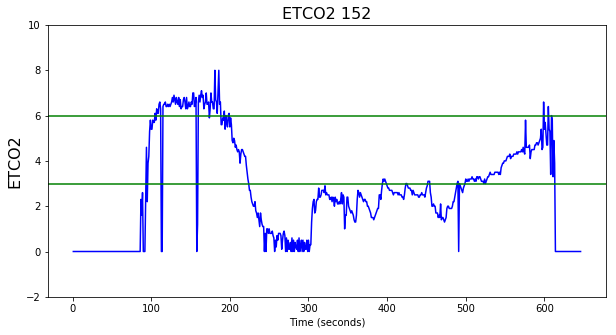

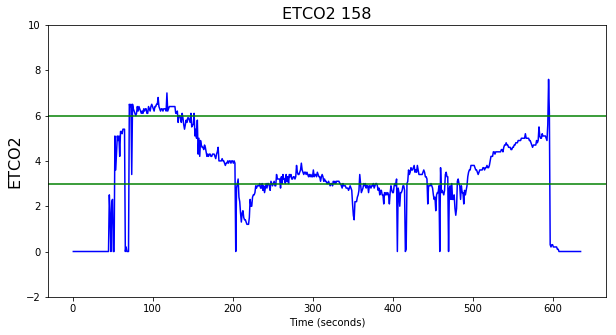

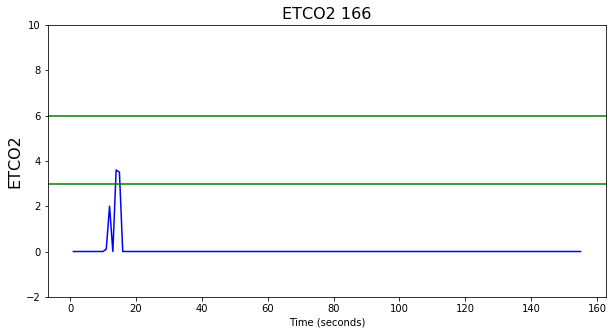

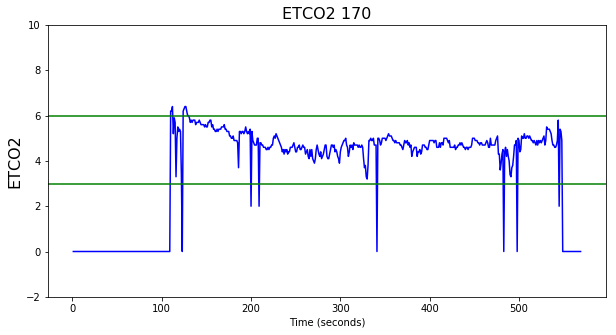

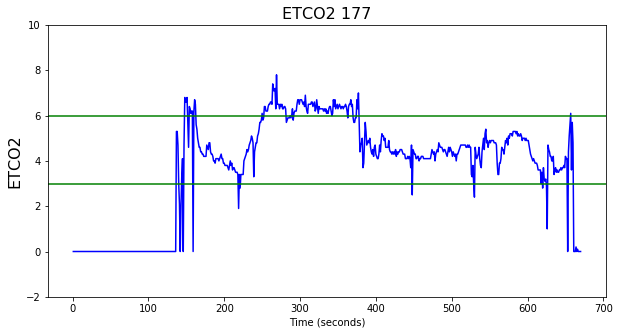

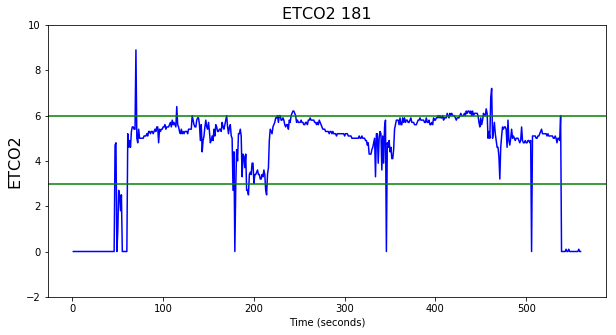

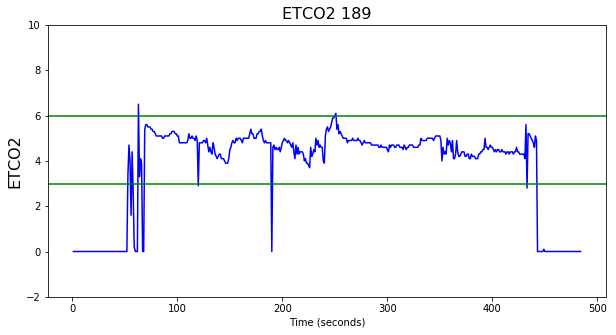

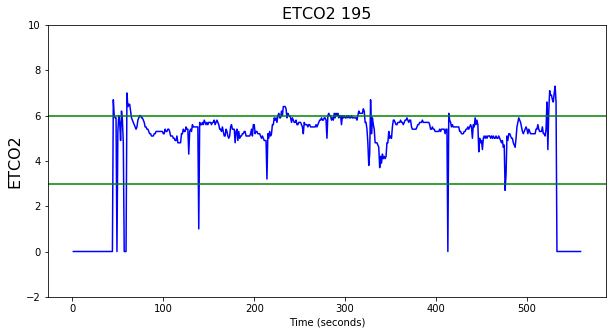

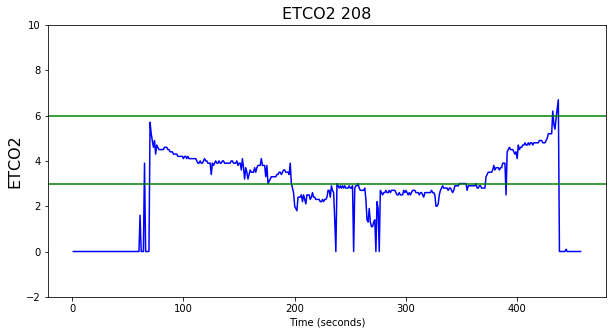

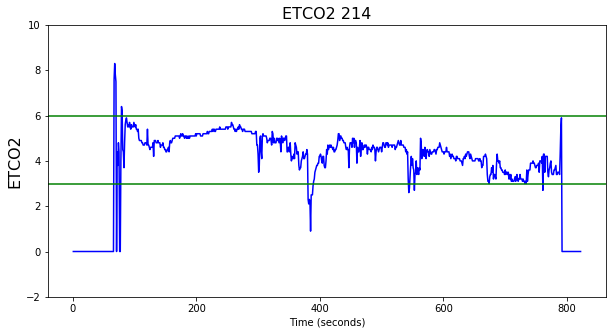

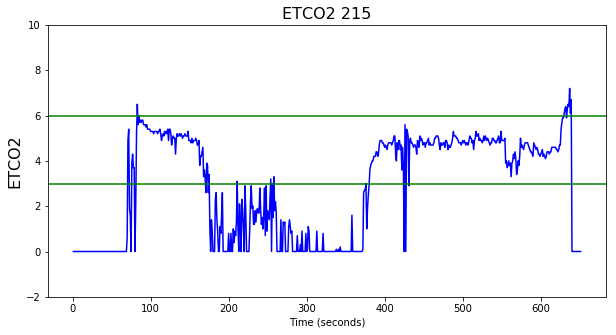

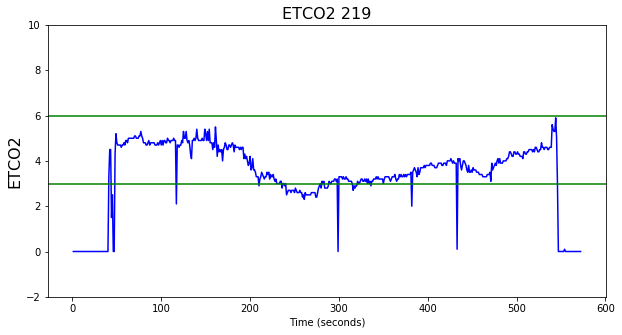

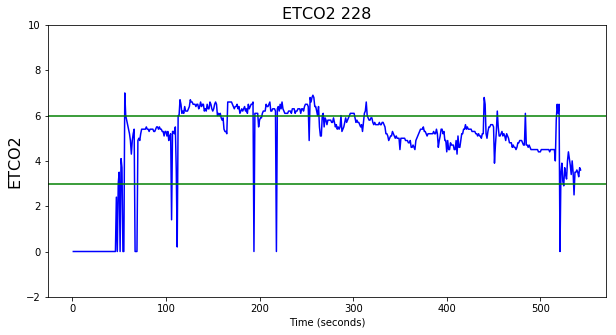

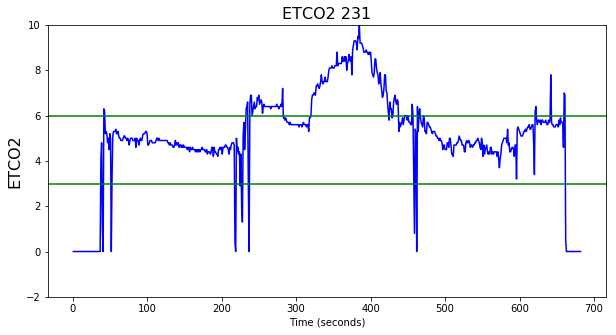

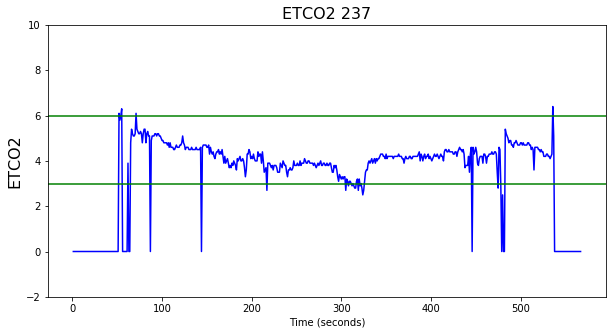

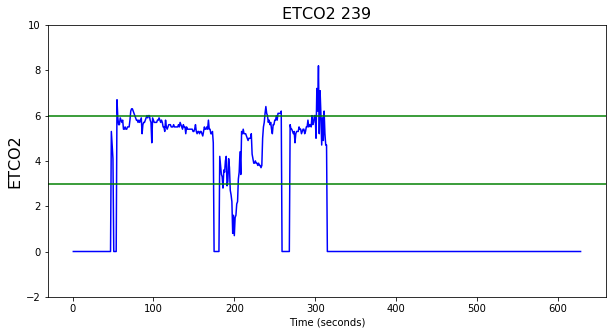

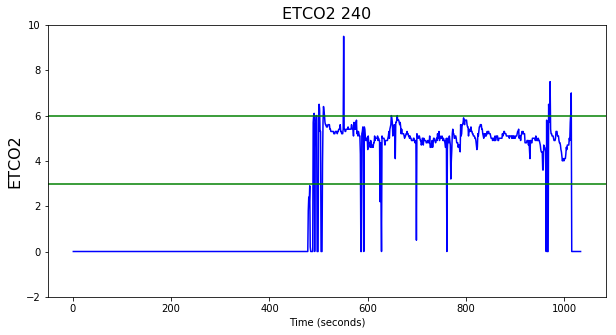

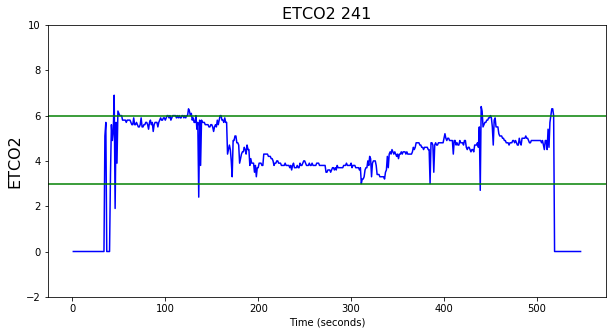

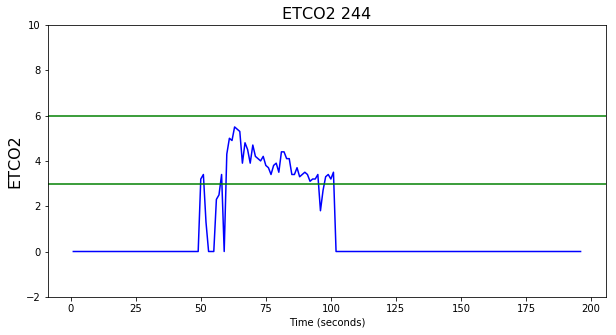

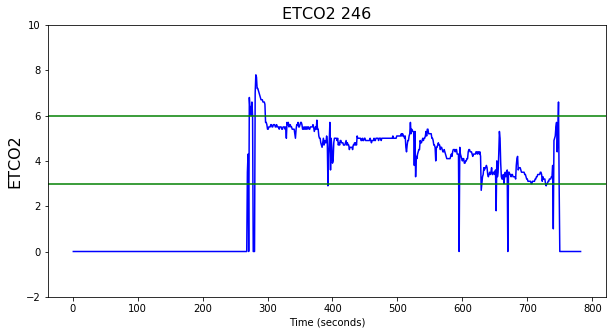

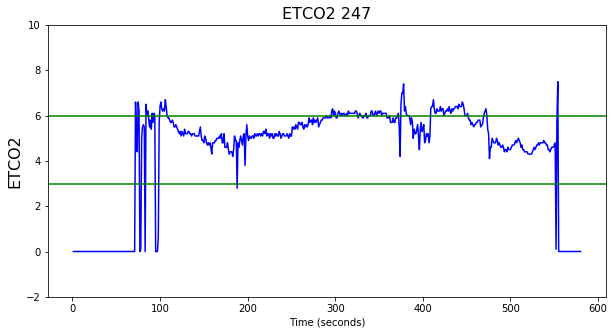

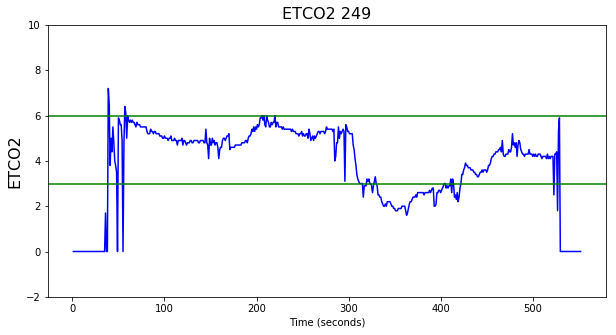

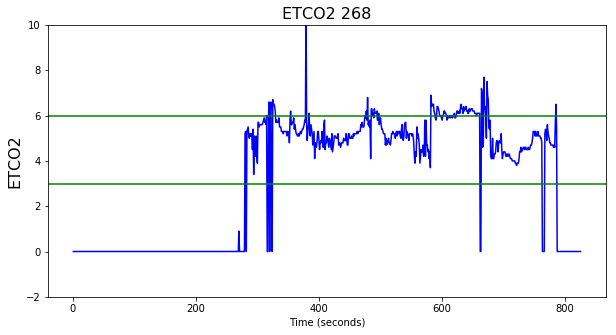

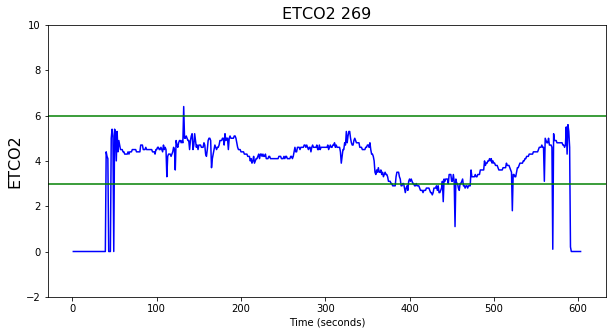

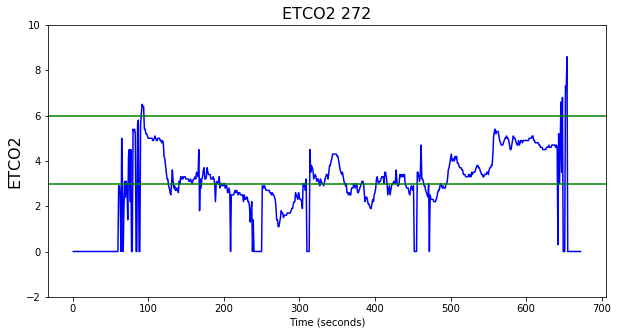

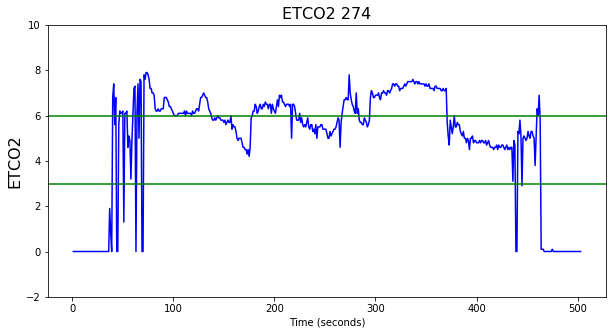

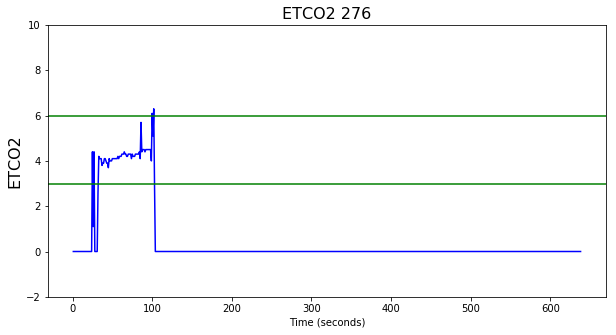

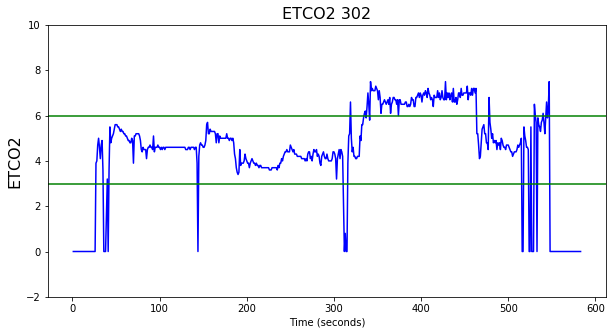

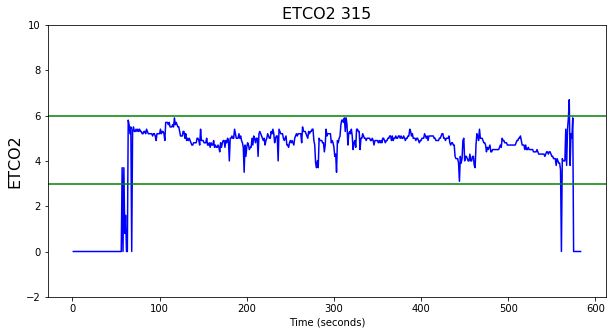

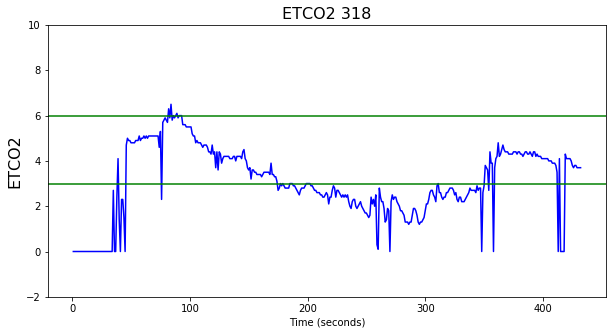

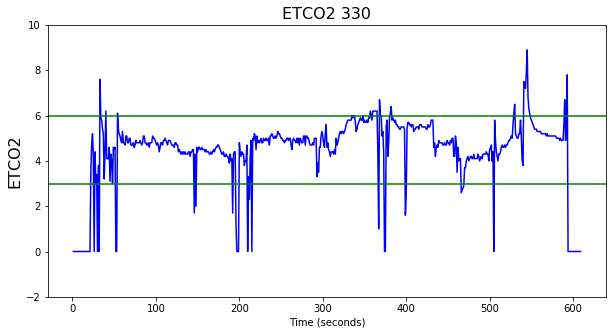

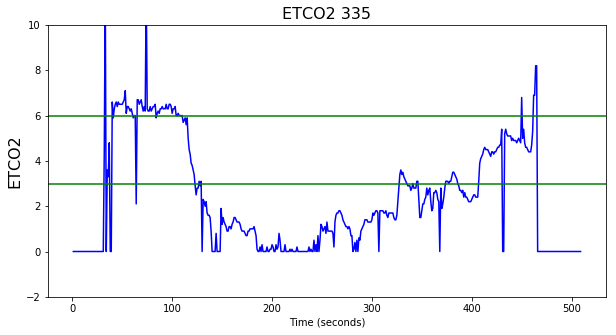

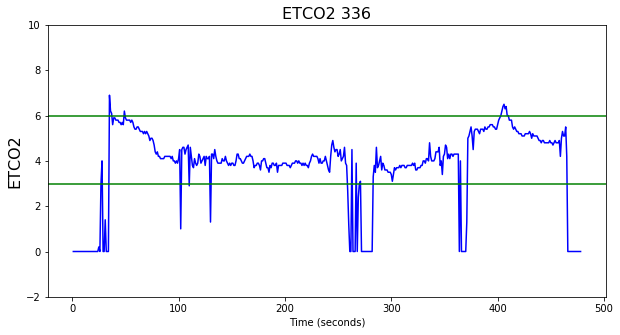

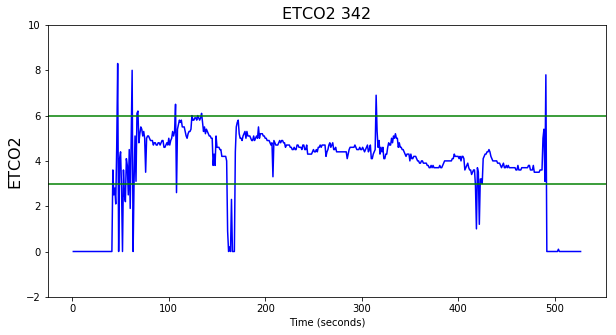

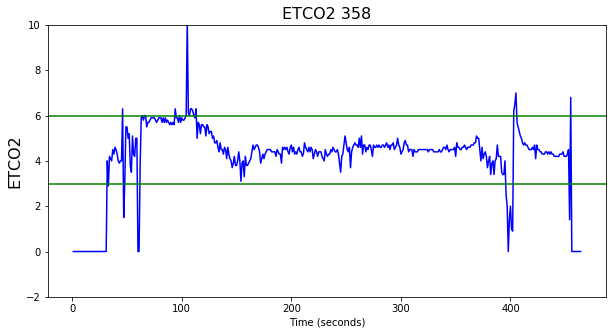

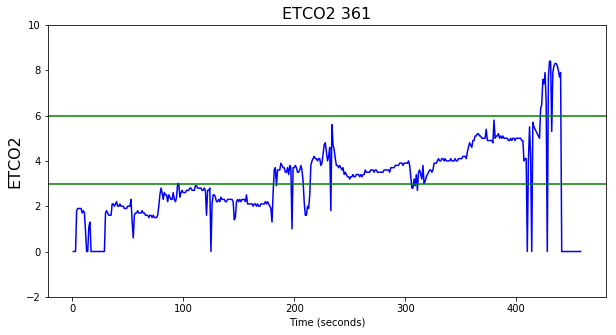

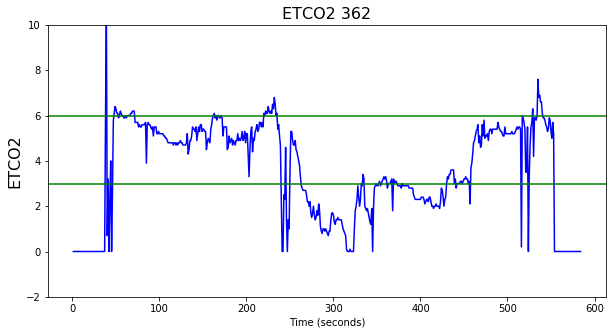

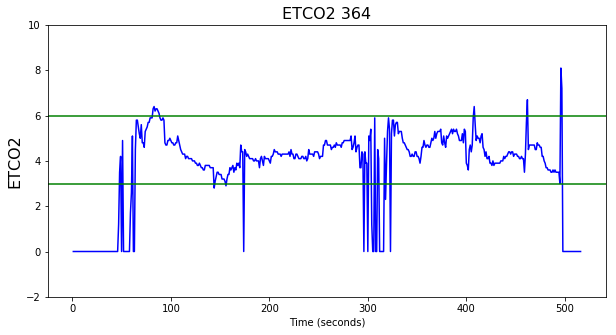

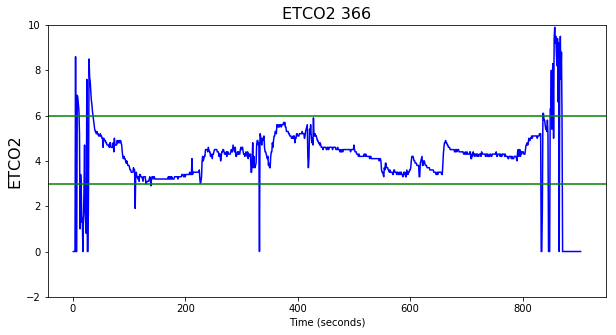

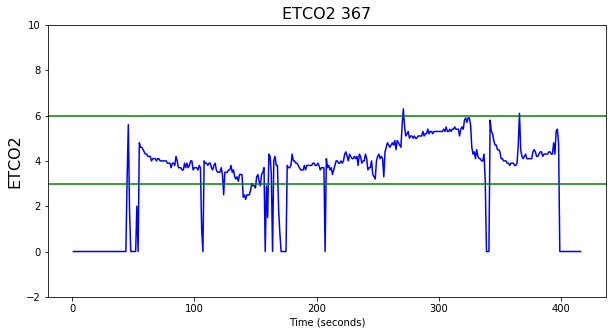

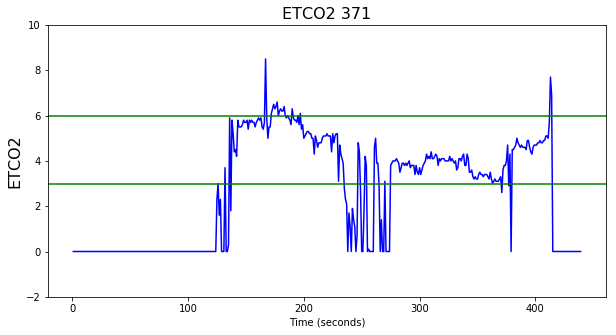

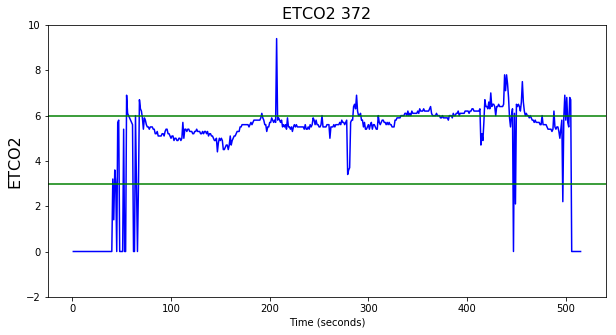

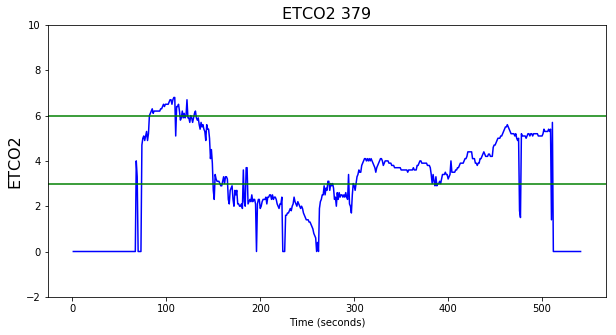

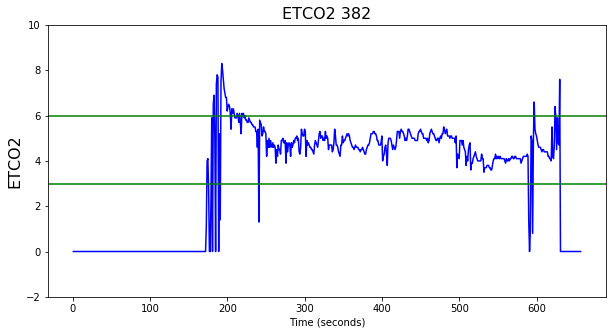

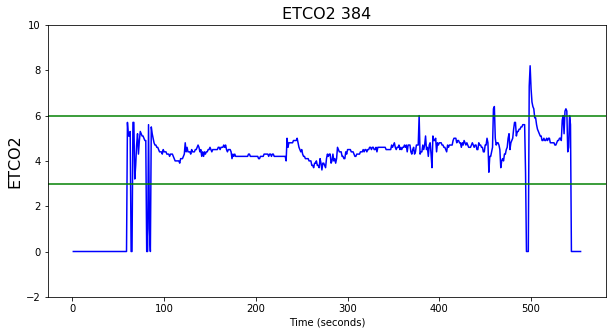

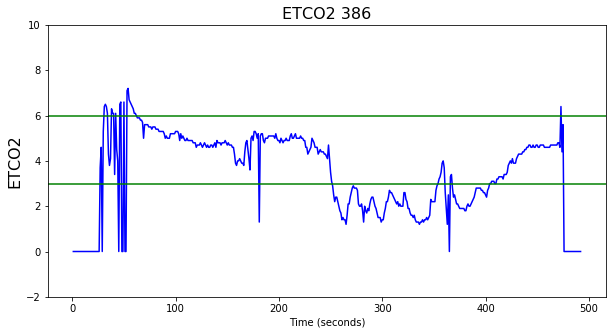

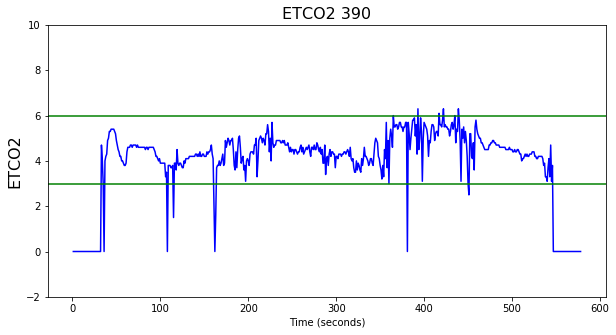

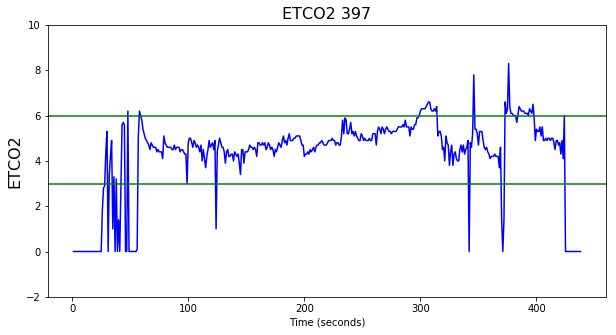

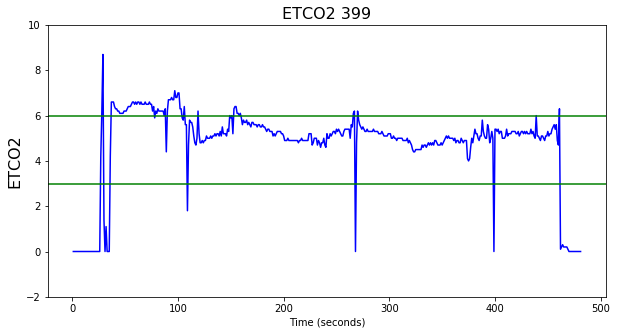

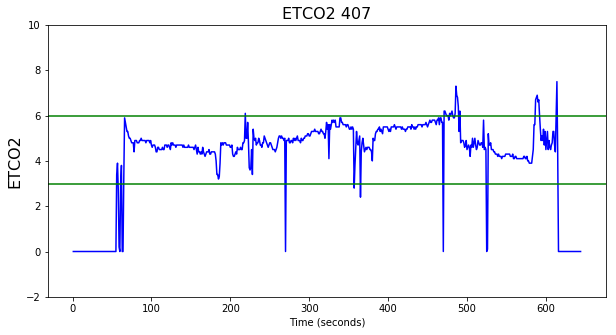

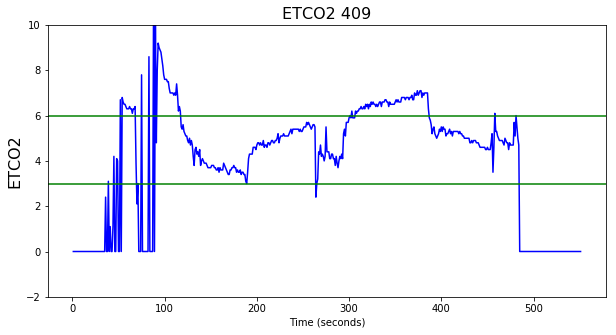

In [113]:
for id_ in dataf_T_1_0.index:
    plt.figure(figsize=(10, 5))
    plt.title("ETCO2 %d"%id_, fontsize=16)
    plt.plot(dataf_T_1_0.columns, dataf_T_1_0.loc[id_,], color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylim(-2,10)
    plt.ylabel('ETCO2', fontsize=16)
    plt.axhline(3, color='green')
    plt.axhline(6, color='green')

In [114]:
#2/ immediate_extubation = 1 & secondary_intubation = 1

In [115]:
dataf_T_1_1 = dataf_T[(dataf_T['immediate_extubation']==1) & (dataf_T['secondary_intubation']==1)]
dataf_T_1_1.drop(['debut','duree', 'fin', 'immediate_extubation', 'secondary_intubation'], axis=1, inplace=True)
dataf_T_1_1.set_index('id_patient', inplace=True)

/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


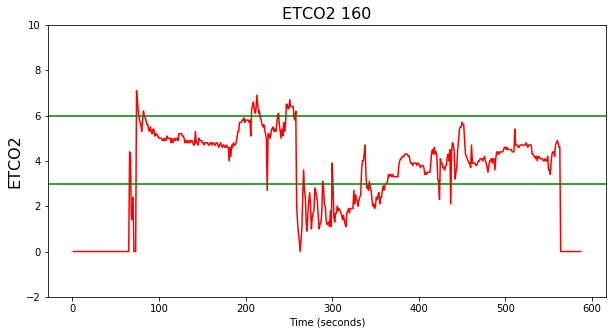

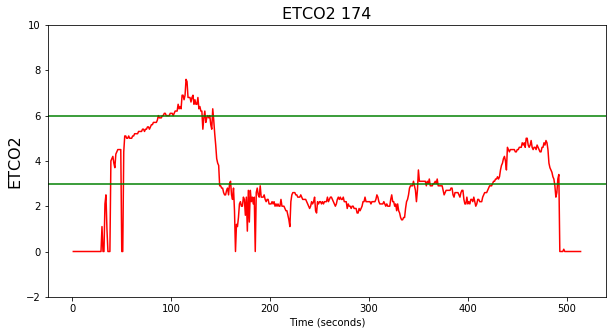

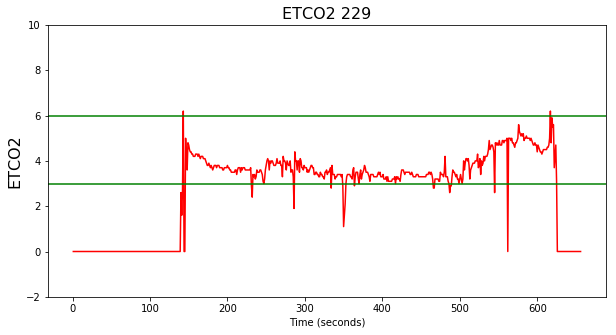

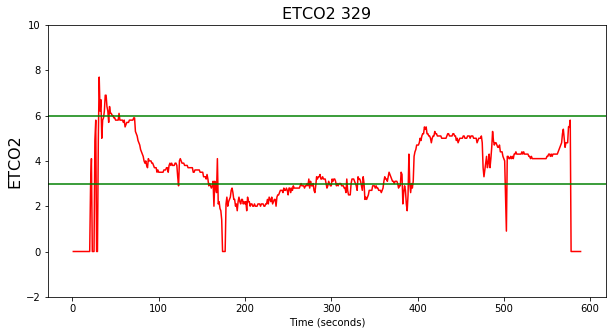

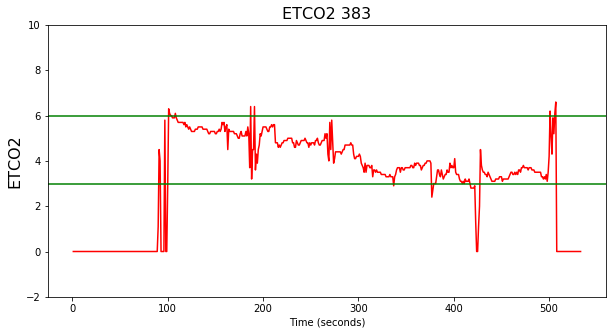

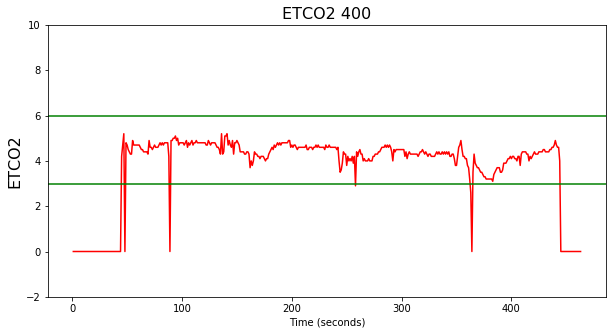

In [117]:
for id_ in dataf_T_1_1.index:
    plt.figure(figsize=(10, 5))
    plt.title("ETCO2 %d"%id_, fontsize=16)
    plt.plot(dataf_T_1_1.columns, dataf_T_1_1.loc[id_,], color='red')
    plt.xlabel('Time (seconds)')
    plt.ylim(-2,10)
    plt.ylabel('ETCO2', fontsize=16)
    plt.axhline(3, color='green')
    plt.axhline(6, color='green')

In [118]:
#3/ immediate_extubation = 0 & secondary_intubation = 0

In [119]:
dataf_T_0_0 = dataf_T[(dataf_T['immediate_extubation']==0) & (dataf_T['secondary_intubation']==0)]
dataf_T_0_0.drop(['debut','duree', 'fin', 'immediate_extubation', 'secondary_intubation'], axis=1, inplace=True)
dataf_T_0_0.set_index('id_patient', inplace=True)

/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


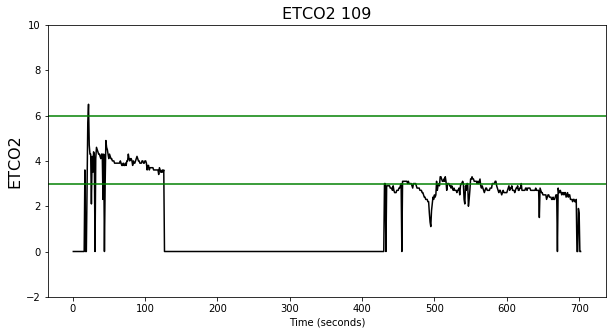

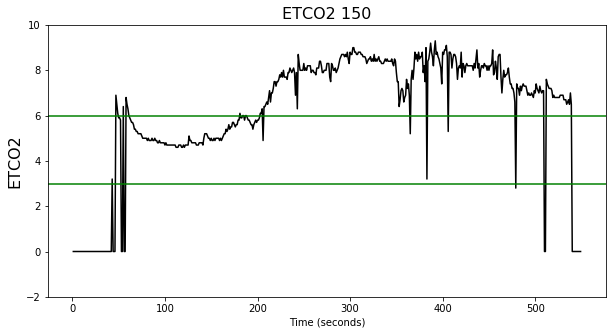

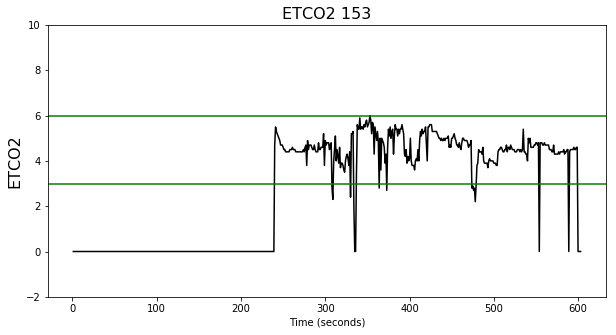

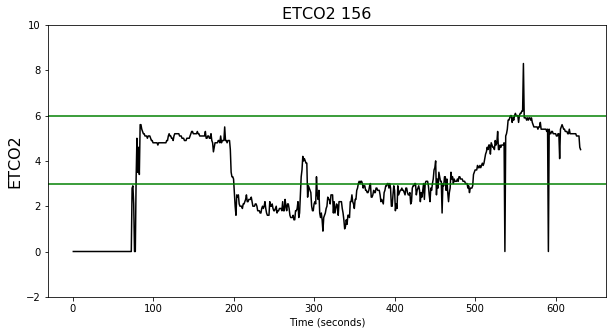

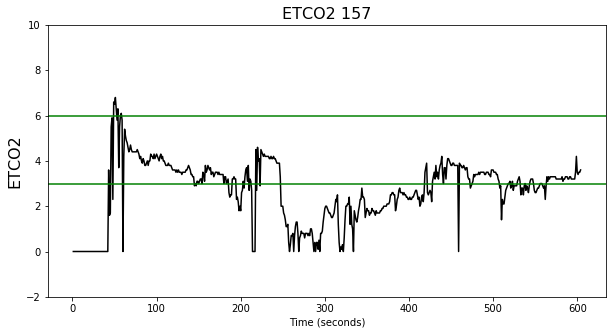

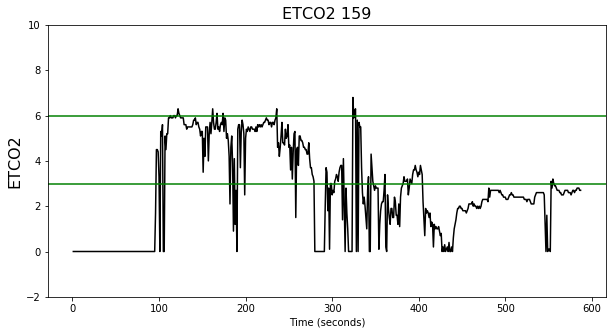

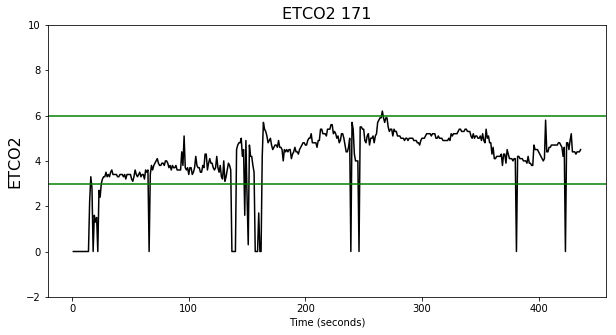

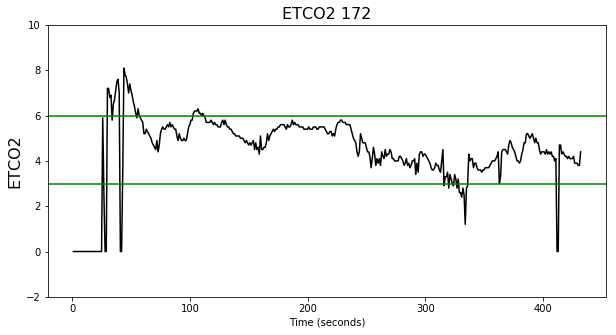

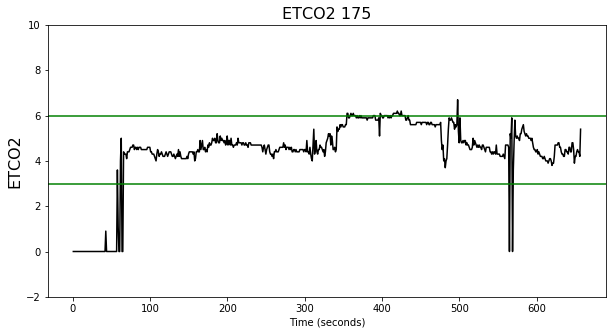

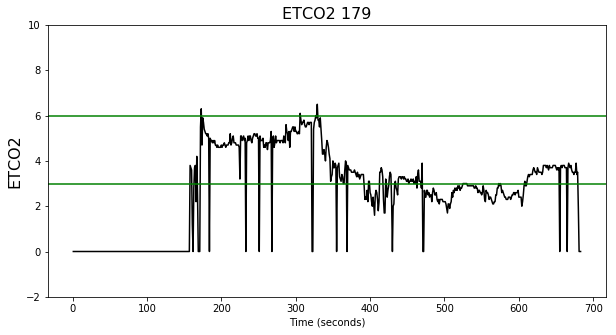

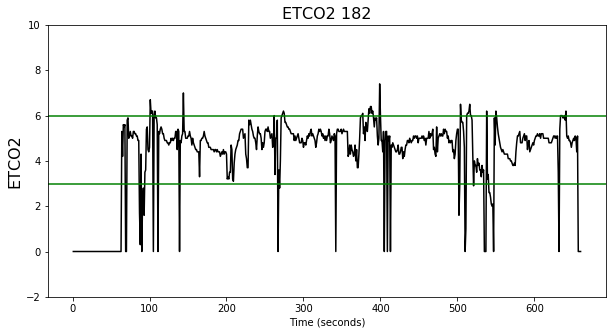

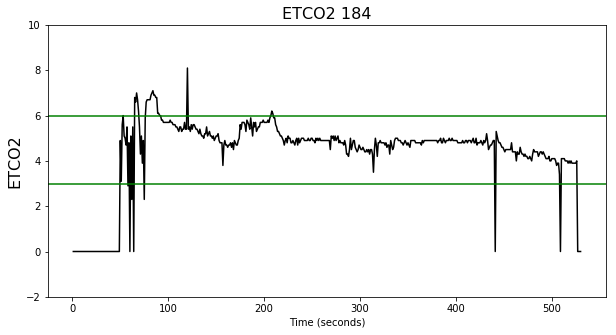

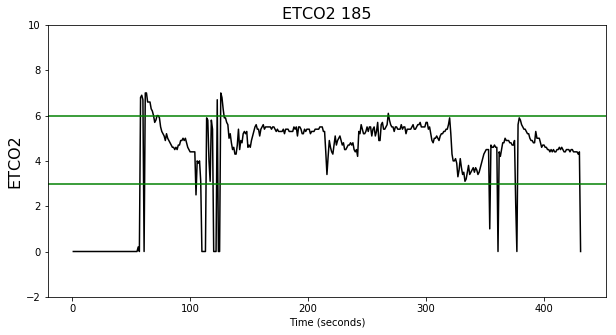

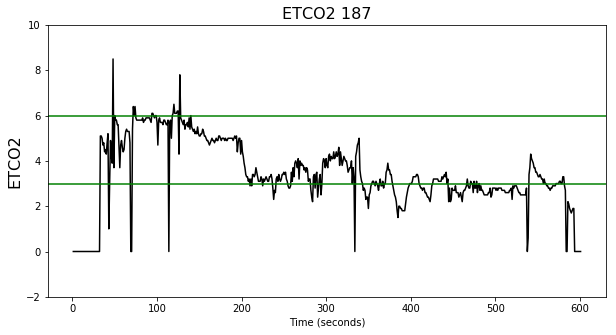

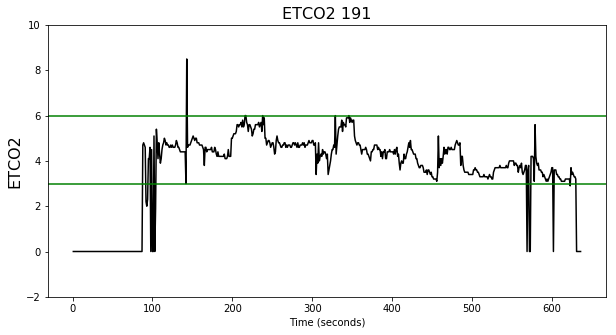

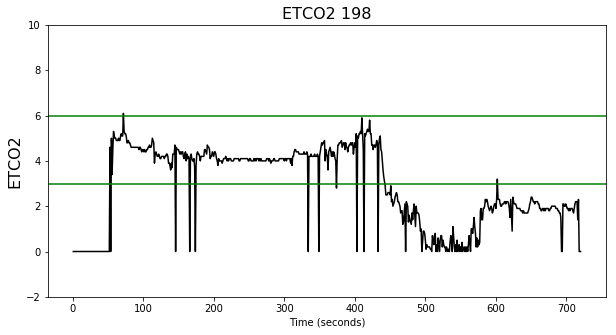

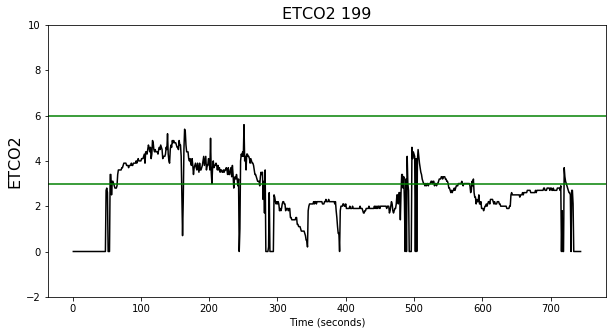

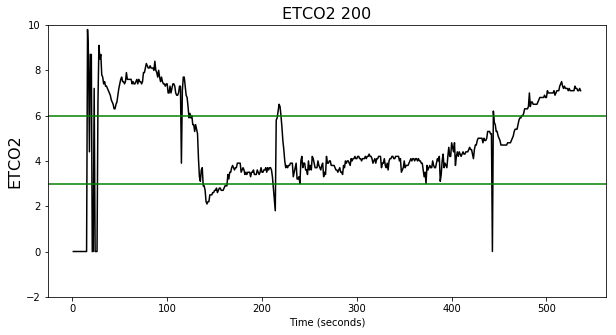

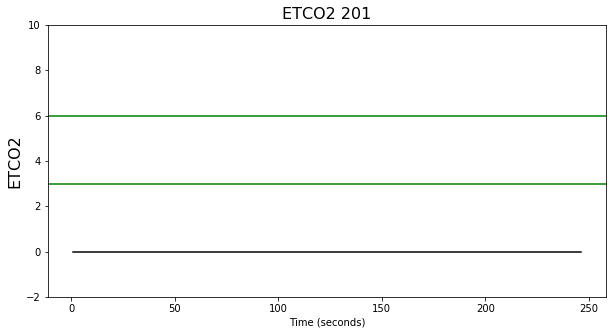

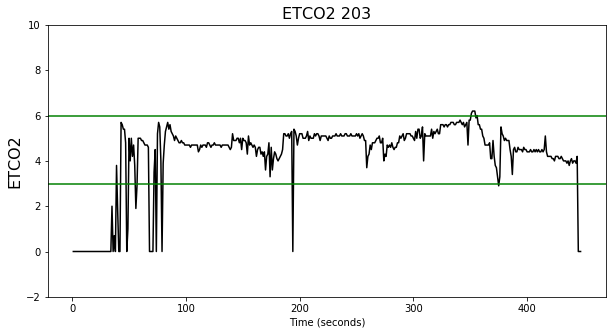

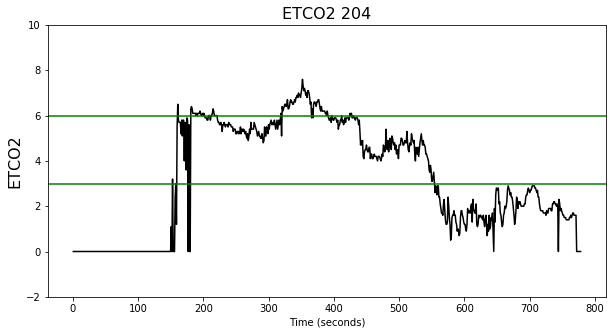

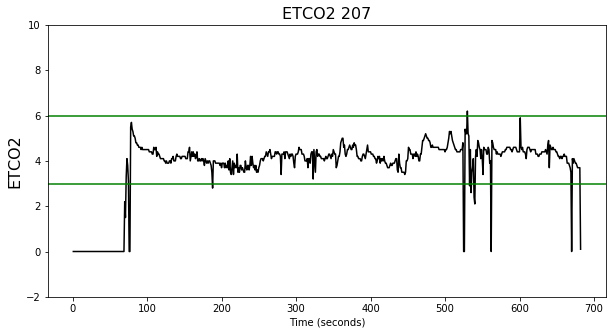

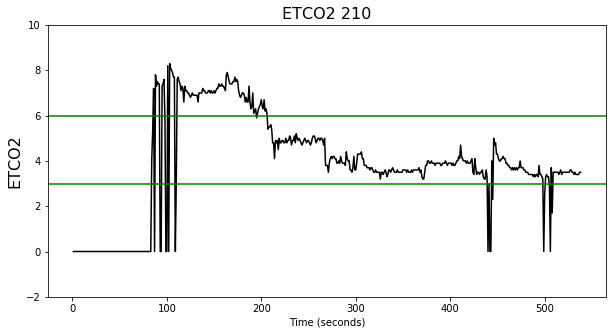

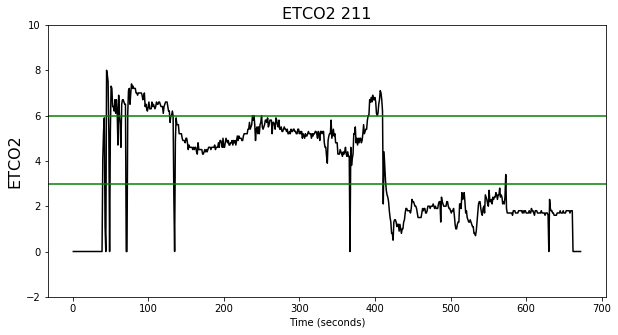

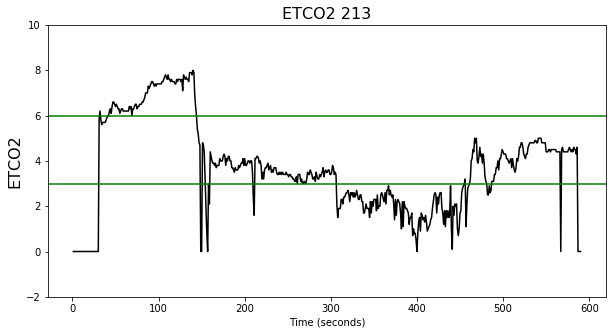

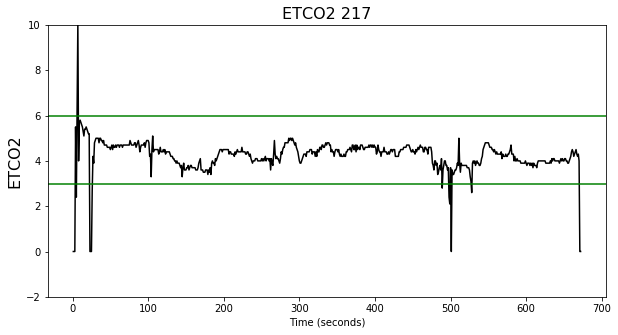

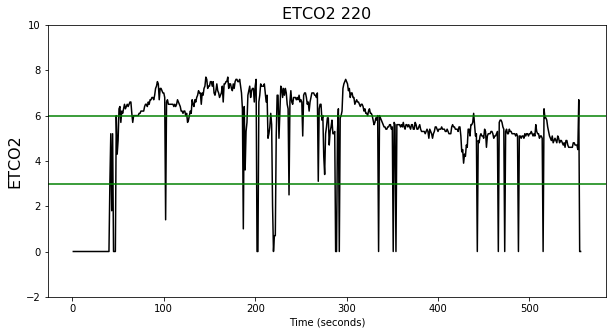

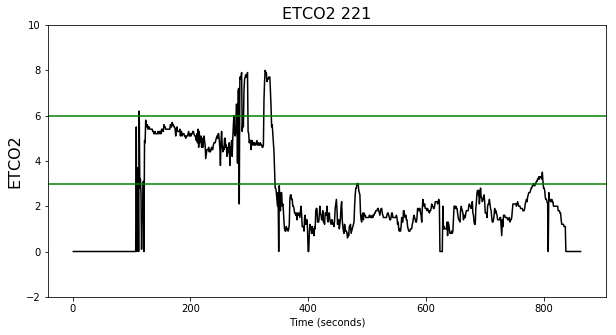

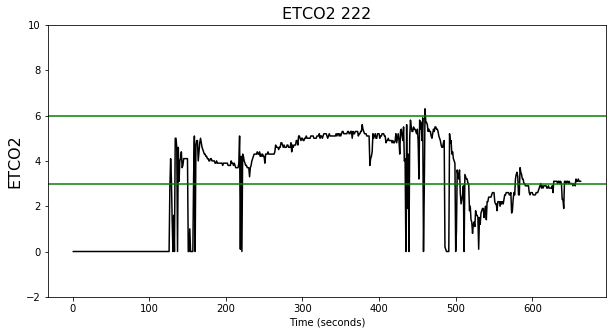

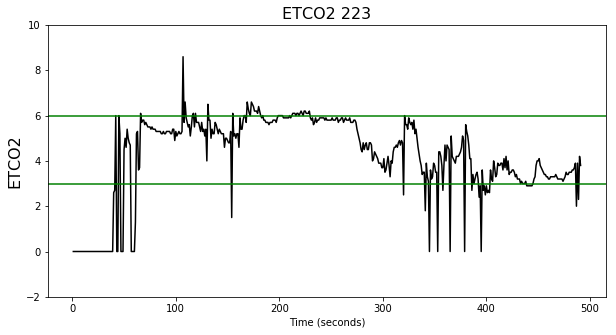

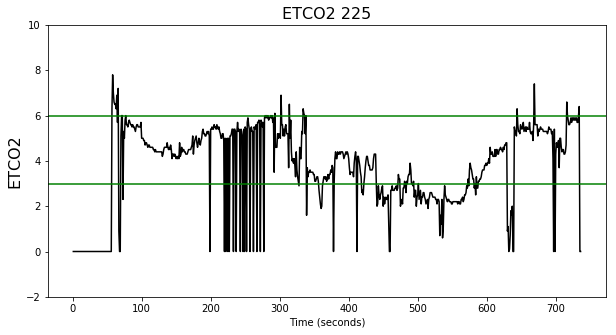

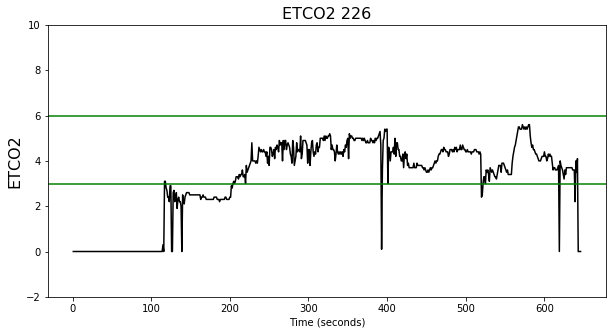

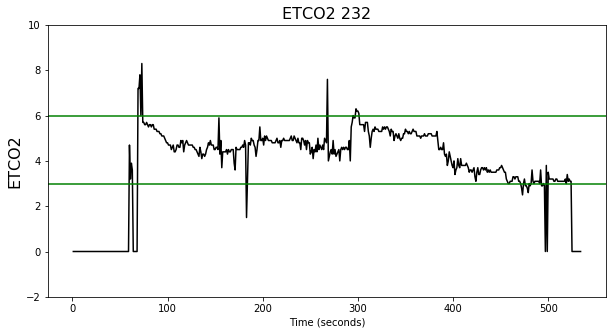

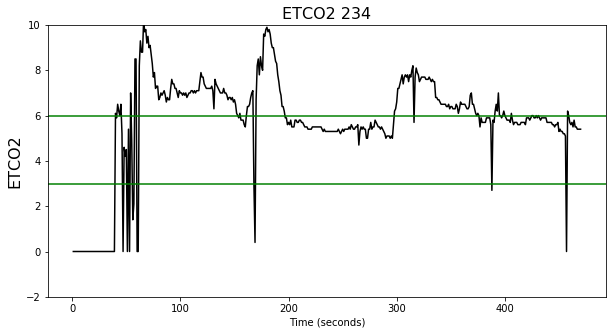

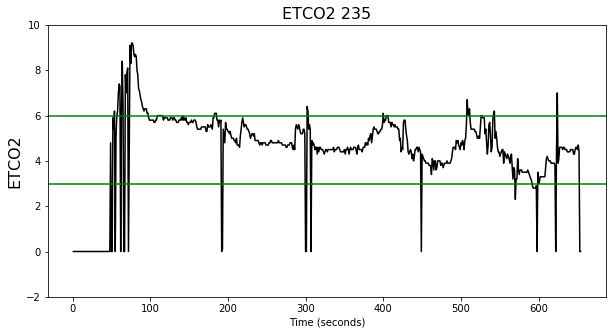

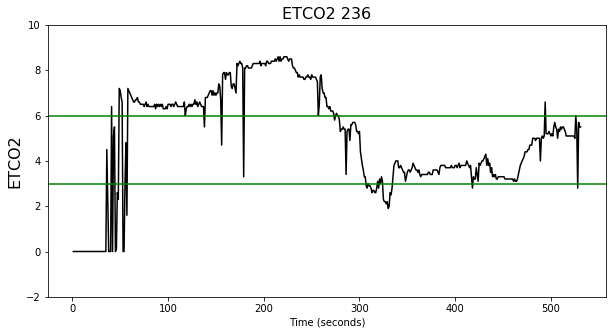

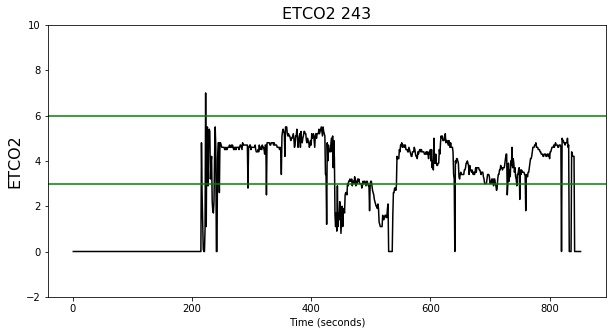

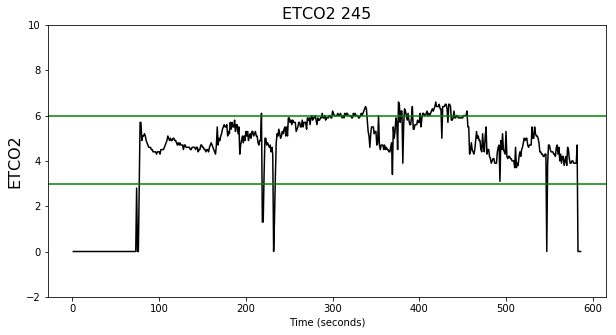

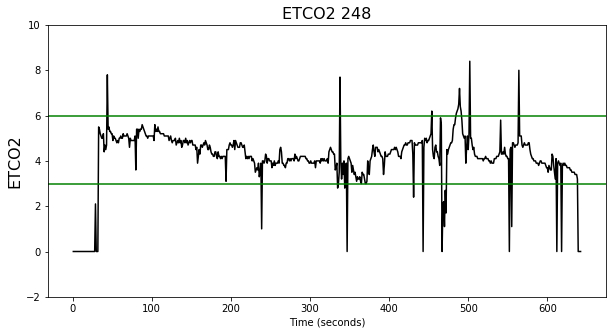

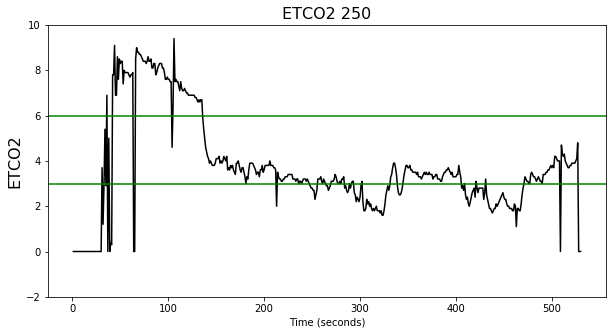

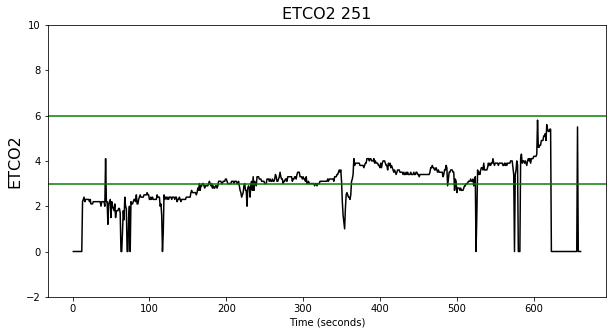

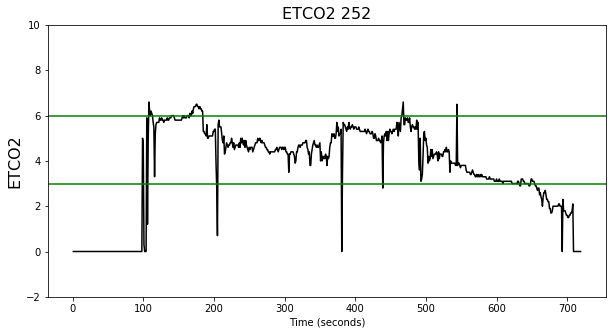

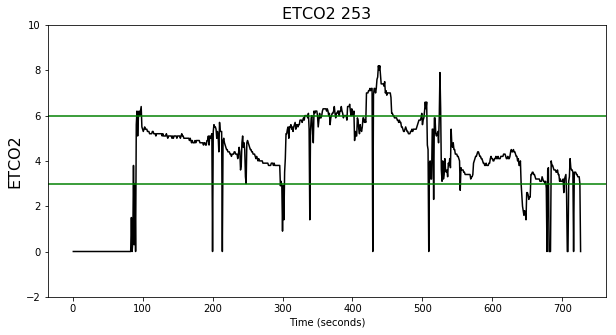

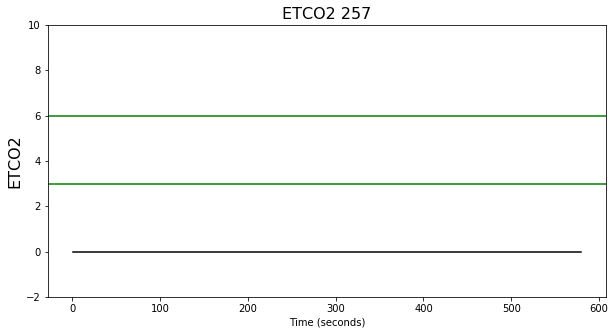

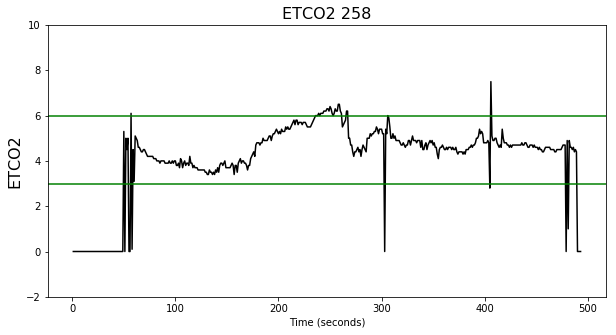

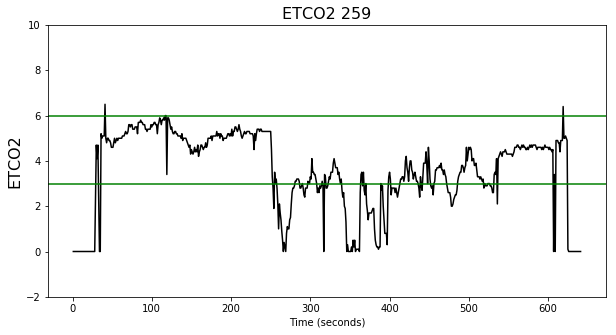

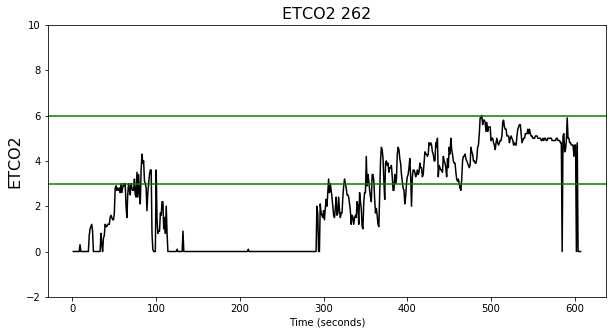

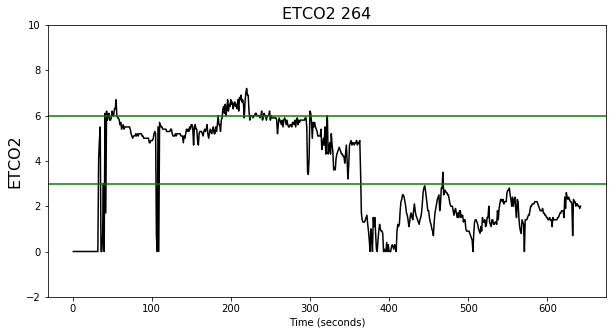

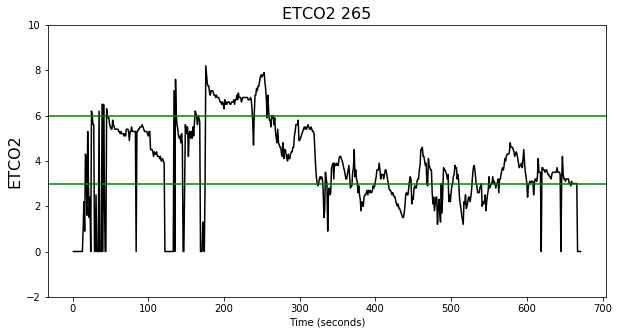

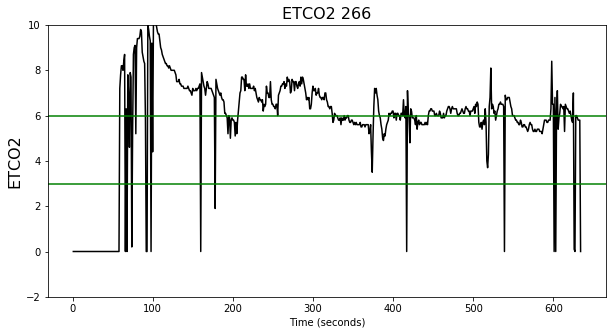

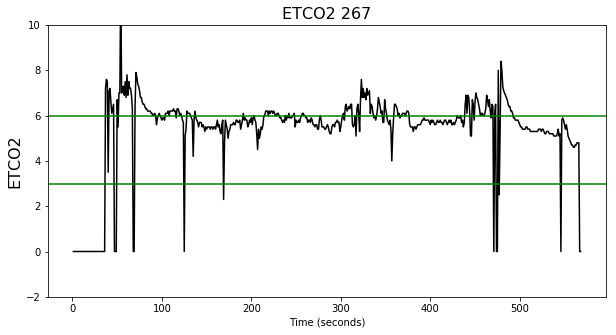

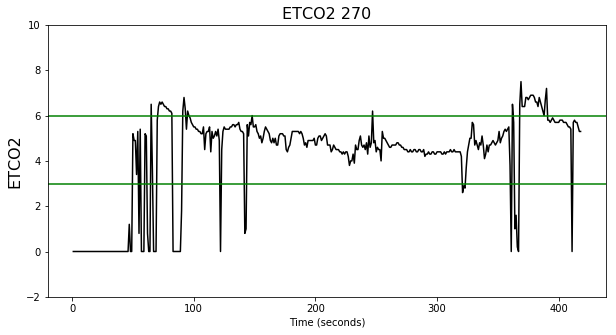

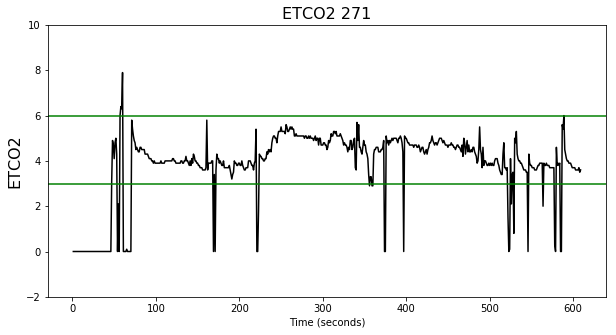

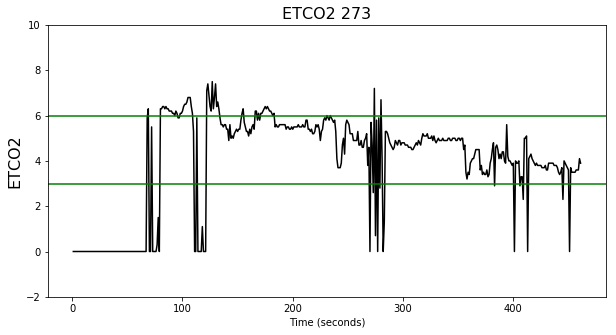

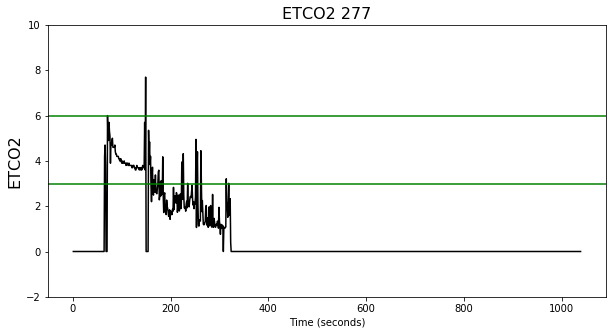

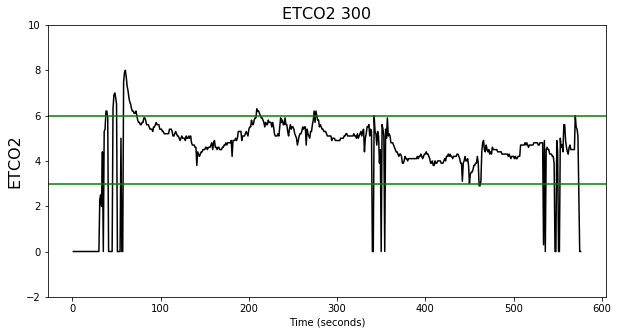

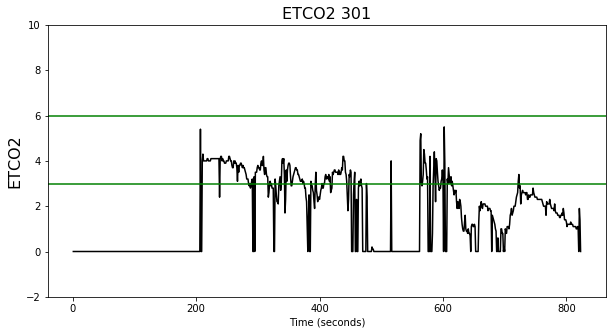

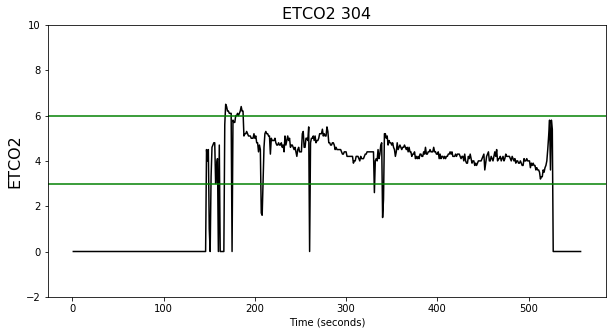

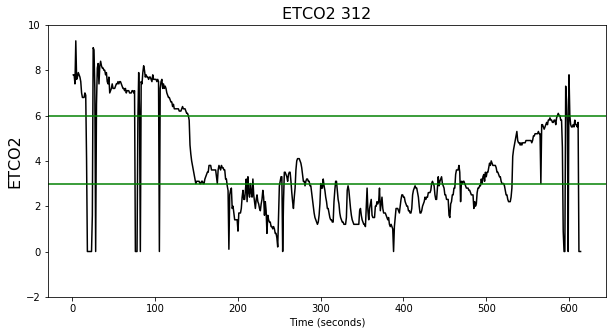

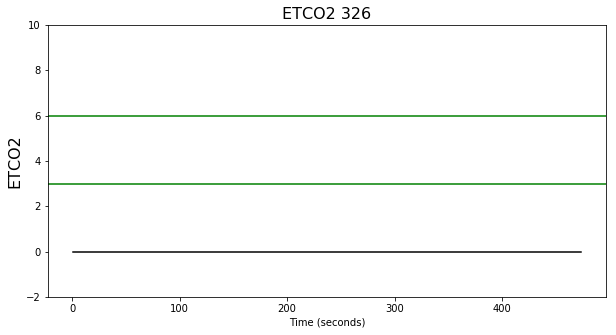

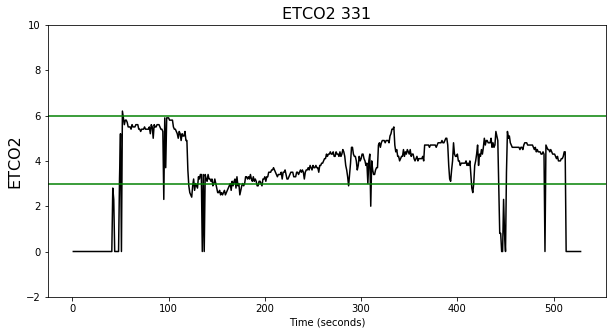

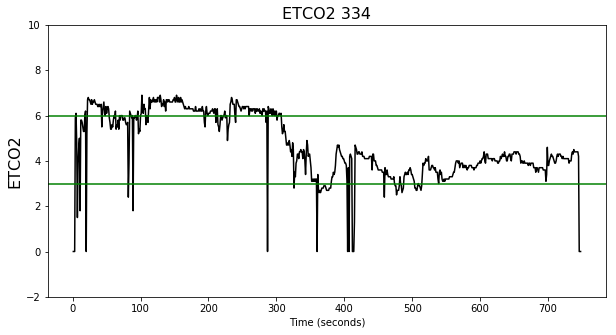

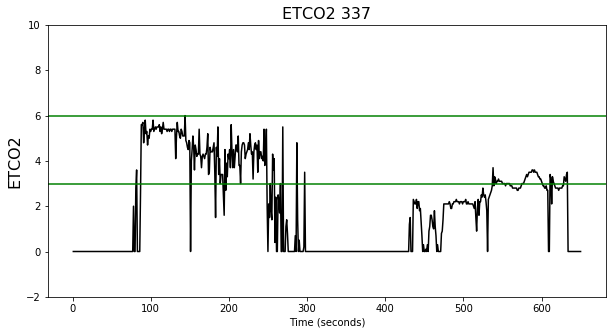

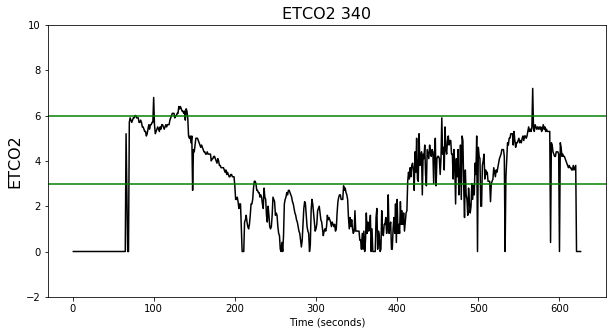

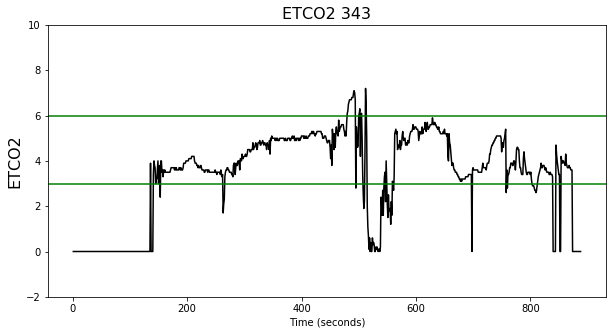

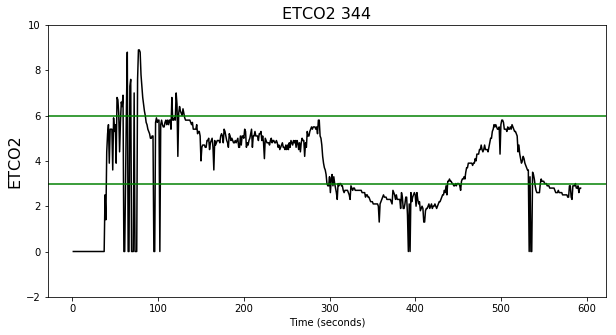

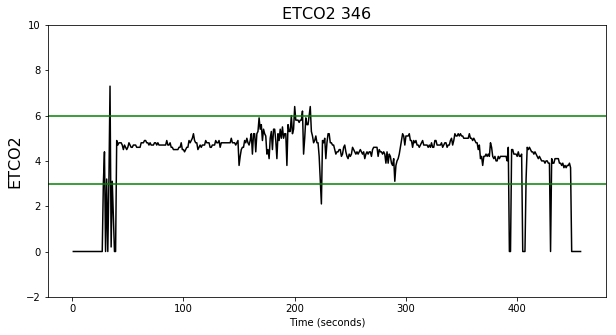

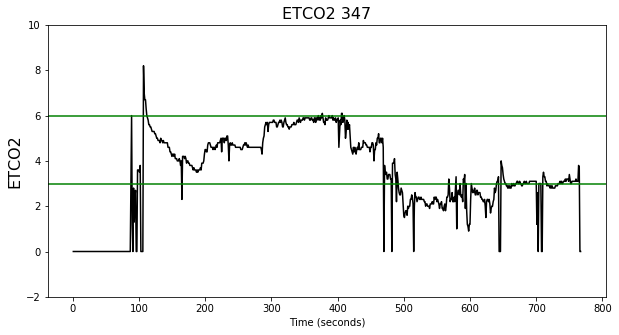

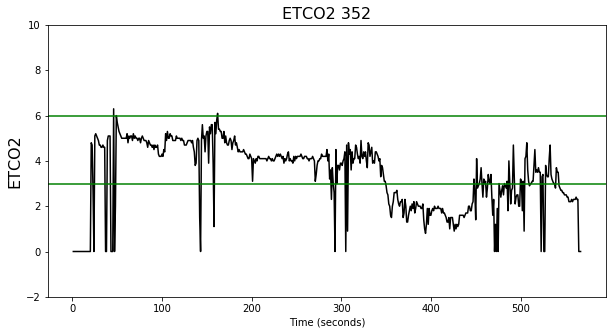

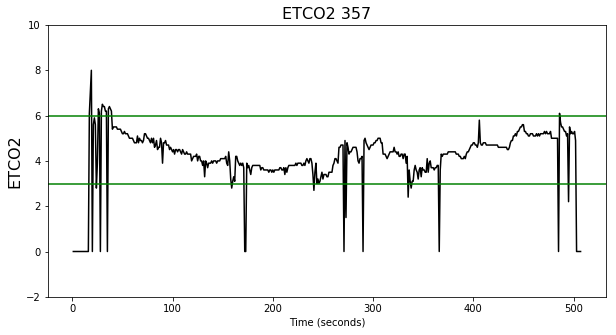

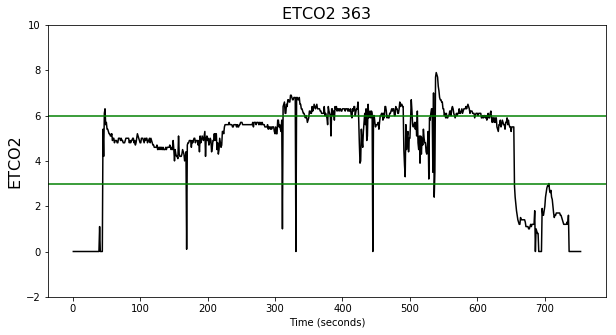

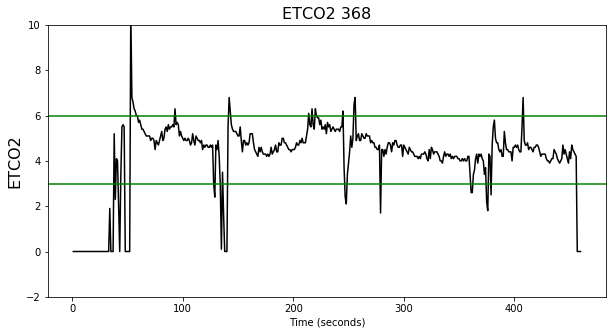

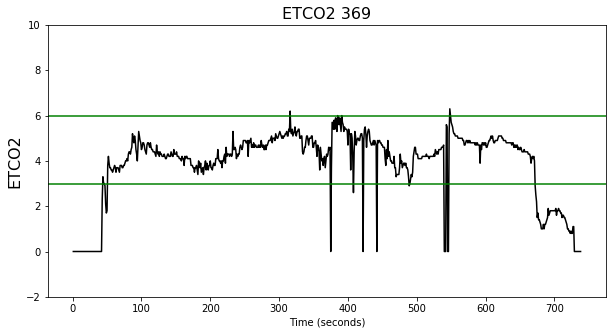

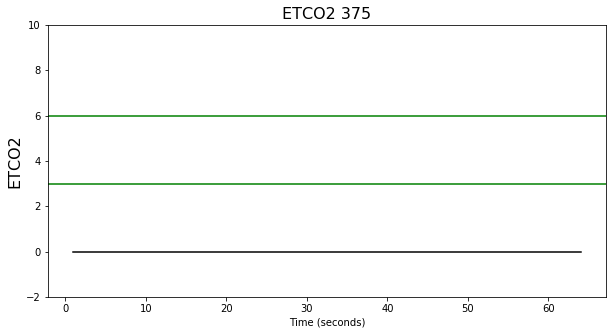

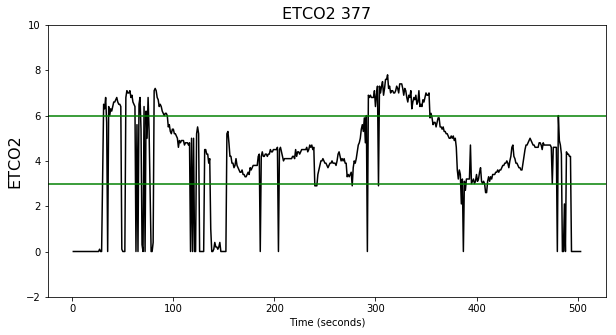

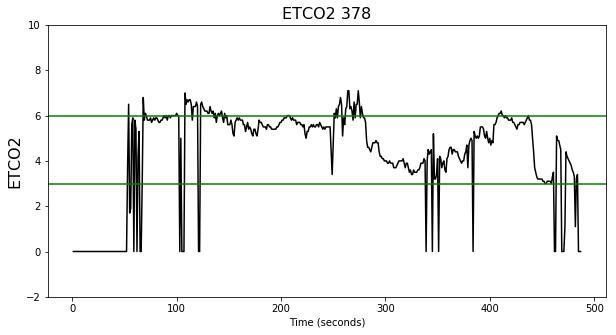

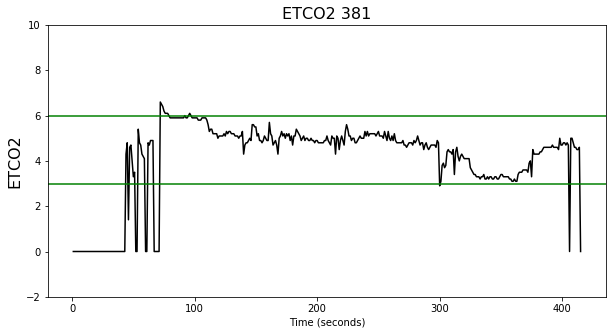

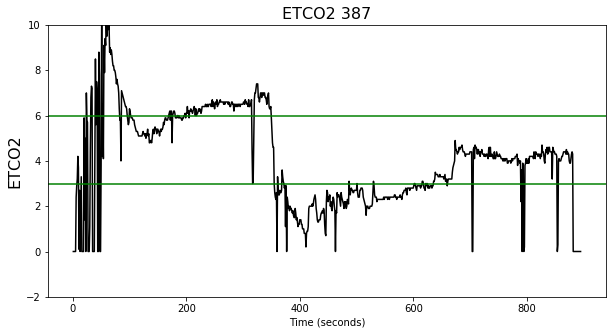

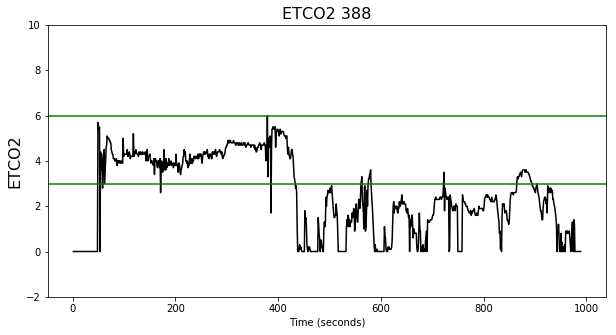

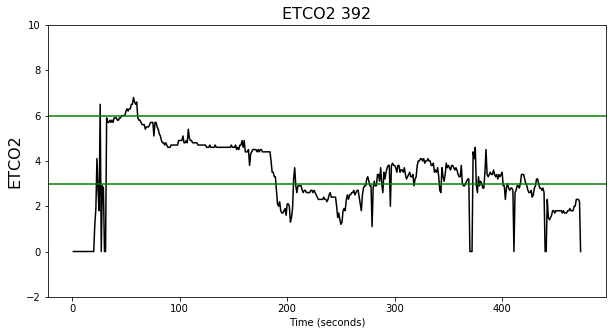

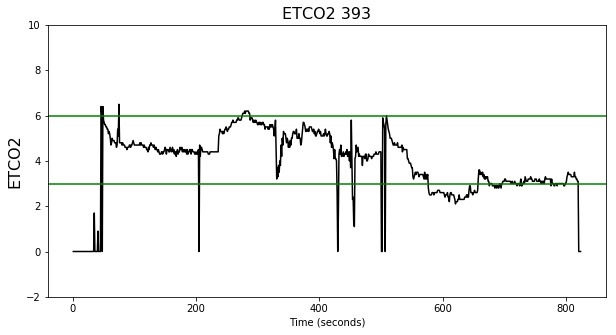

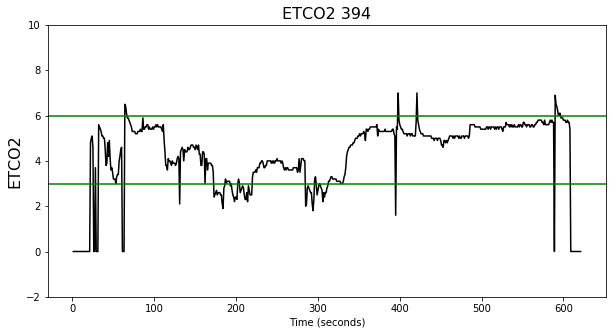

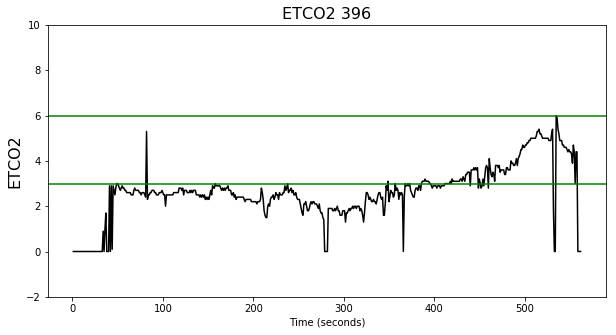

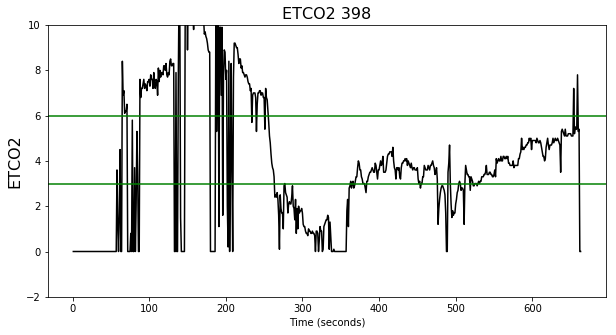

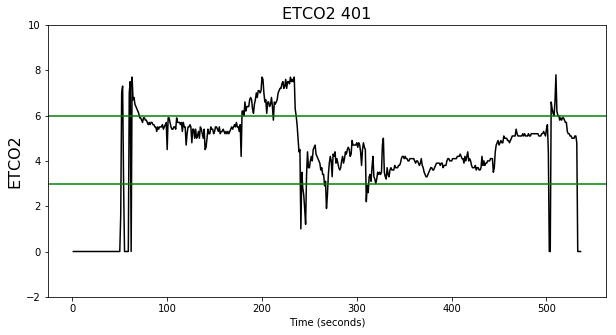

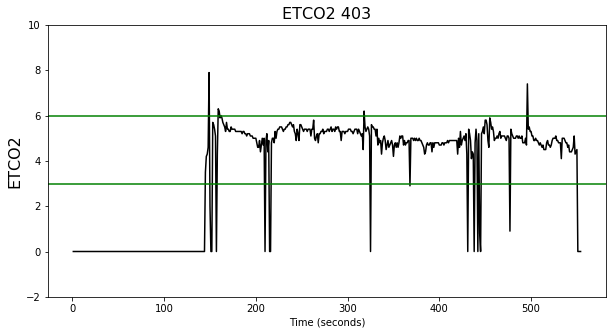

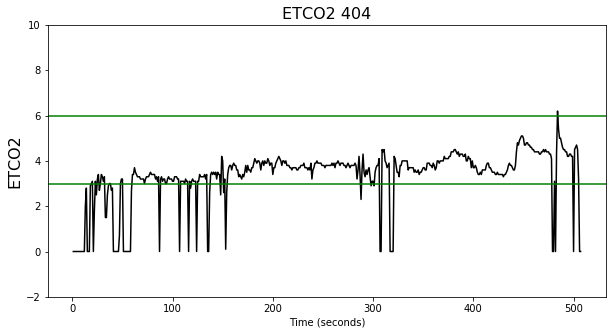

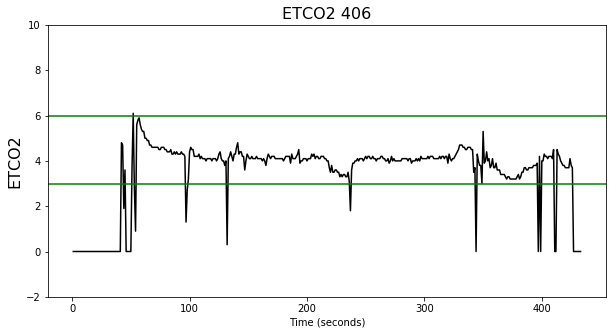

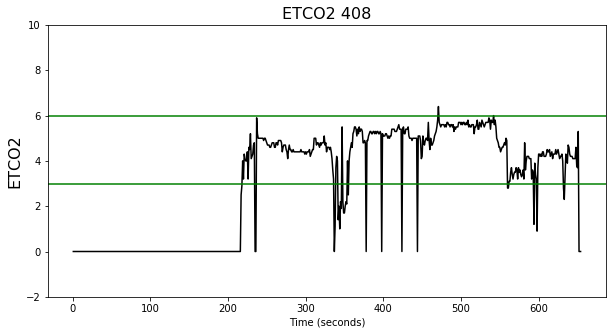

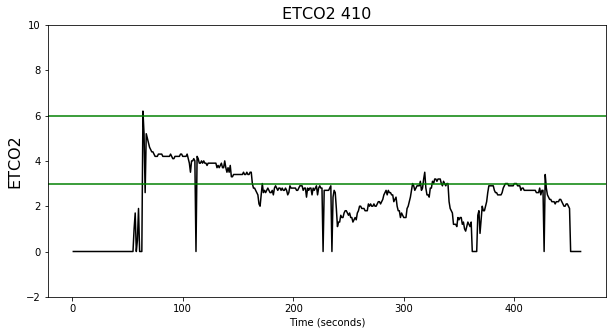

In [121]:
for id_ in dataf_T_0_0.index:
    plt.figure(figsize=(10, 5))
    plt.title("ETCO2 %d"%id_, fontsize=16)
    plt.plot(dataf_T_0_0.columns, dataf_T_0_0.loc[id_,], color='black')
    plt.xlabel('Time (seconds)')
    plt.ylim(-2,10)
    plt.ylabel('ETCO2', fontsize=16)
    plt.axhline(3, color='green')
    plt.axhline(6, color='green')